# Freezer 하나가 Sensor의 온도에 미치는 영향

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from tqdm import tqdm
import os
import seaborn as sns

In [23]:
sensor_id = [329, 332, 335]
freezer_id = [344, 362, 368]

In [ ]:
df = pd.read_csv('df_2102.csv')
print(df.columns)
df['gw_time'] = pd.to_datetime(df['gw_time'])
sensor_id = [329, 332, 335]
freezer_id = [344, 362, 368]
df = df[['gw_time']+['temperature_'+str(_id) for _id in sensor_id]+['operation_'+str(_id) for _id in freezer_id] + ['dT_' + str(_id) for _id in sensor_id]]

In [63]:
df5 = pd.read_csv('df5_2102.csv')
df5['gw_time'] = pd.to_datetime(df5['gw_time'])
df5 = df5[['gw_time']+['temperature_'+str(_id) for _id in sensor_id]+['operation_'+str(_id) for _id in freezer_id] + ['dT_' + str(_id) for _id in sensor_id]]

In [4]:
df_time = pd.DataFrame(df['gw_time'])

In [5]:
df_one = df.loc[df['operation_344']+df['operation_362']+df['operation_368'] <= 2]

In [6]:
df0 = pd.merge(df_time, df_one, how = 'outer', on = 'gw_time')

In [7]:
def test_plot(a=0,b=-1, figure=df0):
    test_figure = figure[a:b]
    plt.figure(figsize = (24,10))
    print('Plotting {}:{}'.format(a,b))
    plt.subplot(2,1,1)
    plt.title("operation of freezers")
    w = 0
    for _id in freezer_id:
        plt.plot(test_figure['gw_time'],test_figure['operation'+'_'+str(_id)]+w, label = 'operation'+'_'+str(_id),alpha = 1)
        w+= 0.015
    plt.ylabel('operation')
    plt.legend()

    plt.subplot(2,1,2)
    plt.title('temperature of sensors')
    for _id in sensor_id:
        plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
    plt.ylabel('temperature')
    plt.grid()
    plt.legend()
    plt.show()
    return test_figure


## Case1: [2150:2300]
- 센서 329가 -20도에 도달해 냉각기 334 가동
- 센서 329가 -21도에 도달해 냉각기 334 가동 중지
- Timedelta('0 days 00:38:45') 동안 가동

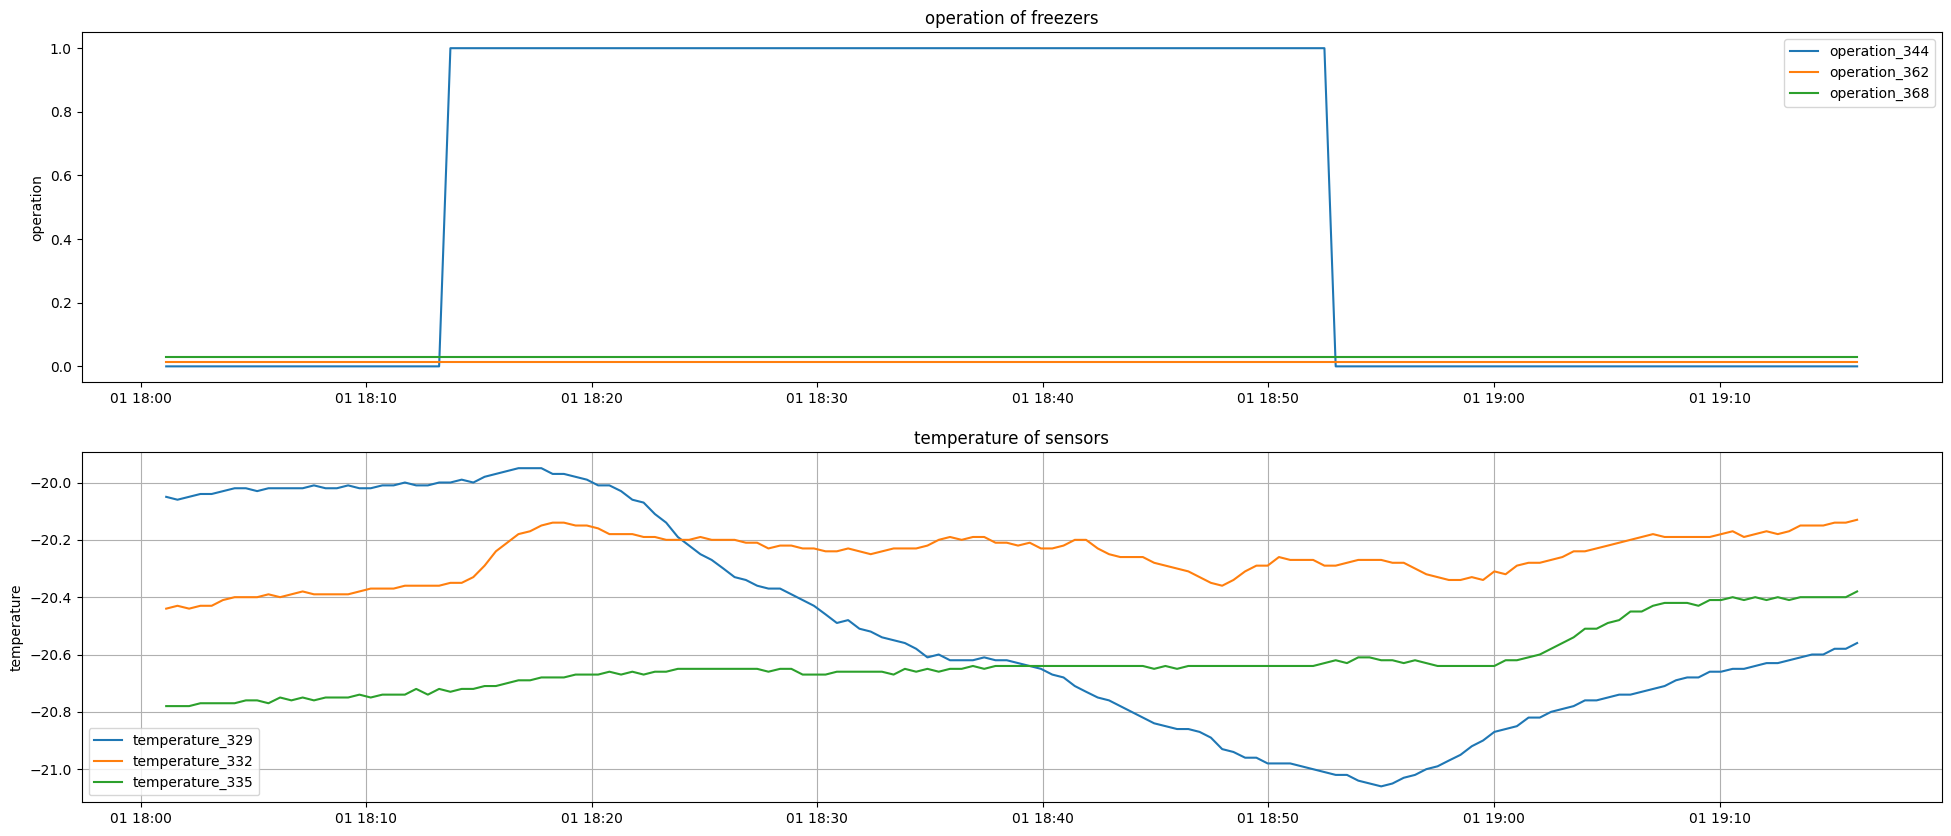

In [123]:
d1 = test_plot(2150,2300,df0)

In [10]:
df3 = df[['gw_time']+['dT_329']+['temperature_329']]
df3[df3['gw_time'].between('2021-02-01 18:10:00','2021-02-01 18:30:00')]

gw_time  dT_329  temperature_329
2168 2021-02-01 18:10:12    0.00           -20.02
2169 2021-02-01 18:10:43    0.01           -20.01
2170 2021-02-01 18:11:13    0.00           -20.01
2171 2021-02-01 18:11:43    0.01           -20.00
2172 2021-02-01 18:12:13   -0.01           -20.01
2173 2021-02-01 18:12:44    0.00           -20.01
2174 2021-02-01 18:13:14    0.01           -20.00
2175 2021-02-01 18:13:44    0.00           -20.00
2176 2021-02-01 18:14:14    0.01           -19.99
2177 2021-02-01 18:14:45   -0.01           -20.00
2178 2021-02-01 18:15:15    0.02           -19.98
2179 2021-02-01 18:15:45    0.01           -19.97
2180 2021-02-01 18:16:15    0.01           -19.96
2181 2021-02-01 18:16:45    0.01           -19.95
2182 2021-02-01 18:17:16    0.00           -19.95
2183 2021-02-01 18:17:46    0.00           -19.95
2184 2021-02-01 18:18:16   -0.02           -19.97
2185 2021-02-01 18:18:46    0.00           -19.97
2186 2021-02-01 18:19:17   -0.01           -19.98
2187 2021-02-01 18:19:47   -0.01           -19.99
2188 2021-02-01 18:20:17   -0.02           -20.01
2189 2021-02-01 18:20:47    0.00           -20.01
2190 2021-02-01 18:21:18   -0.02           -20.03
2191 2021-02-01 18:21:48   -0.03           -20.06
2192 2021-02-01 18:22:18   -0.01           -20.07
2193 2021-02-01 18:22:48   -0.04           -20.11
2194 2021-02-01 18:23:18   -0.03           -20.14
2195 2021-02-01 18:23:49   -0.05           -20.19
2196 2021-02-01 18:24:19   -0.03           -20.22
2197 2021-02-01 18:24:49   -0.03           -20.25
2198 2021-02-01 18:25:19   -0.02           -20.27
2199 2021-02-01 18:25:50   -0.03           -20.30
2200 2021-02-01 18:26:20   -0.03           -20.33
2201 2021-02-01 18:26:50   -0.01           -20.34
2202 2021-02-01 18:27:20   -0.02           -20.36
2203 2021-02-01 18:27:50   -0.01           -20.37
2204 2021-02-01 18:28:21    0.00           -20.37
2205 2021-02-01 18:28:51   -0.02           -20.39
2206 2021-02-01 18:29:21   -0.02           -20.41
2207 2021-02-01 18:29:51   -0.02           -20.43

In [125]:
pd.to_datetime('2021-02-01 18:52:29	')- pd.to_datetime('2021-02-01 18:13:44')

Timedelta('0 days 00:38:45')

## Case2: [2300:2400]
- 센서 332가 -20도에 도달해 냉각기 362 가동
- 센서 329가 -21도에 도달해 냉각기 362 가동 중지
- Timedelta('0 days 00:38:12') 동안 가동

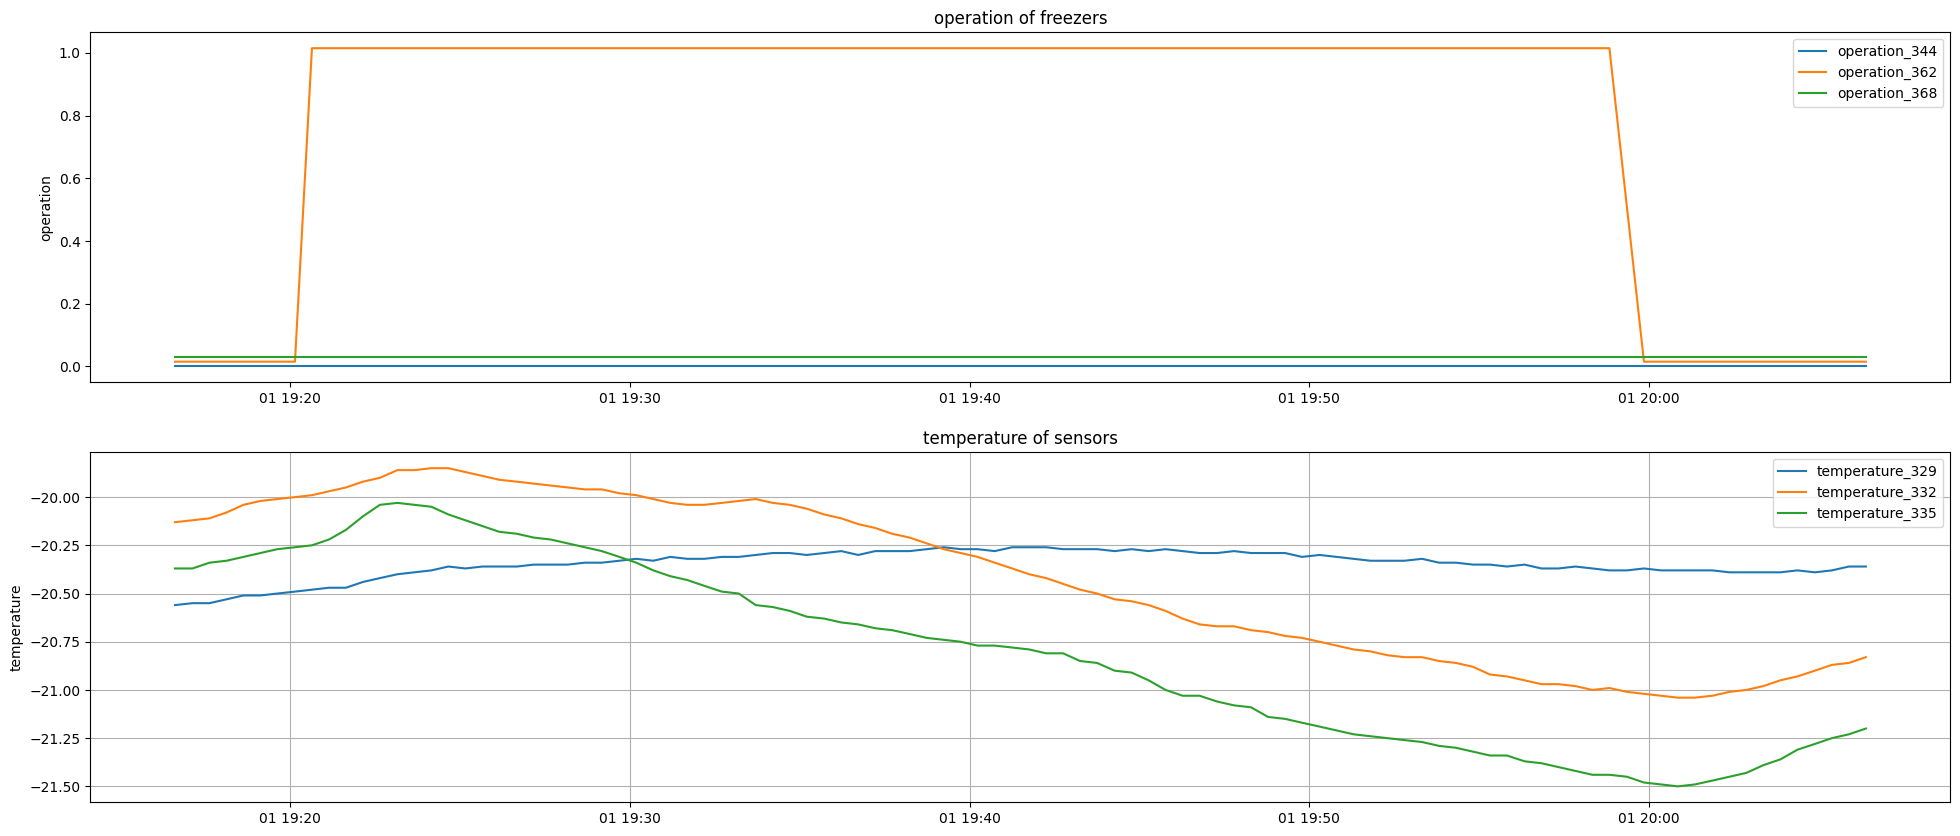

In [126]:
c2 = test_plot(2300,2400,df0)

In [127]:
c2[c2['operation_362']==1]

gw_time  temperature_329  temperature_332  temperature_335  \
2308 2021-02-01 19:20:38           -20.48           -19.99           -20.25   
2309 2021-02-01 19:21:08           -20.47           -19.97           -20.22   
2310 2021-02-01 19:21:38           -20.47           -19.95           -20.17   
2311 2021-02-01 19:22:08           -20.44           -19.92           -20.10   
2312 2021-02-01 19:22:38           -20.42           -19.90           -20.04   
...                  ...              ...              ...              ...   
2380 2021-02-01 19:56:50           -20.37           -20.97           -21.38   
2381 2021-02-01 19:57:20           -20.37           -20.97           -21.40   
2382 2021-02-01 19:57:50           -20.36           -20.98           -21.42   
2383 2021-02-01 19:58:20           -20.37           -21.00           -21.44   
2384 2021-02-01 19:58:50           -20.38           -20.99           -21.44   

      operation_344  operation_362  operation_368  
2308            0.0            1.0            0.0  
2309            0.0            1.0            0.0  
2310            0.0            1.0            0.0  
2311            0.0            1.0            0.0  
2312            0.0            1.0            0.0  
...             ...            ...            ...  
2380            0.0            1.0            0.0  
2381            0.0            1.0            0.0  
2382            0.0            1.0            0.0  
2383            0.0            1.0            0.0  
2384            0.0            1.0            0.0  

[77 rows x 7 columns]

In [26]:
df3 = df[['gw_time']+['dT_332']+['temperature_332']]
df3[df3['gw_time'].between('2021-02-01 19:20:00','2021-02-01 19:30:00')]

gw_time  dT_332  temperature_332
2307 2021-02-01 19:20:08    0.01           -20.00
2308 2021-02-01 19:20:38    0.01           -19.99
2309 2021-02-01 19:21:08    0.02           -19.97
2310 2021-02-01 19:21:38    0.02           -19.95
2311 2021-02-01 19:22:08    0.03           -19.92
2312 2021-02-01 19:22:38    0.02           -19.90
2313 2021-02-01 19:23:09    0.04           -19.86
2314 2021-02-01 19:23:39    0.00           -19.86
2315 2021-02-01 19:24:09    0.01           -19.85
2316 2021-02-01 19:24:39    0.00           -19.85
2317 2021-02-01 19:25:09   -0.02           -19.87
2318 2021-02-01 19:25:39   -0.02           -19.89
2319 2021-02-01 19:26:09   -0.02           -19.91
2320 2021-02-01 19:26:40   -0.01           -19.92
2321 2021-02-01 19:27:10   -0.01           -19.93
2322 2021-02-01 19:27:40   -0.01           -19.94
2323 2021-02-01 19:28:10   -0.01           -19.95
2324 2021-02-01 19:28:40   -0.01           -19.96
2325 2021-02-01 19:29:10    0.00           -19.96
2326 2021-02-01 19:29:41   -0.02           -19.98

In [128]:
pd.to_datetime('	2021-02-02 03:54:00	')-pd.to_datetime('2021-02-02 03:20:17')

Timedelta('0 days 00:33:43')

## Case3: [3200:3400]
- 센서 329 -20도에 도달해 냉각기 334 가동
- 센서 329 -21도에 도달해 냉각기 334 가동 중지
- Timedelta('0 days 00:33:43') 동안 가동

Plotting 3200:3400


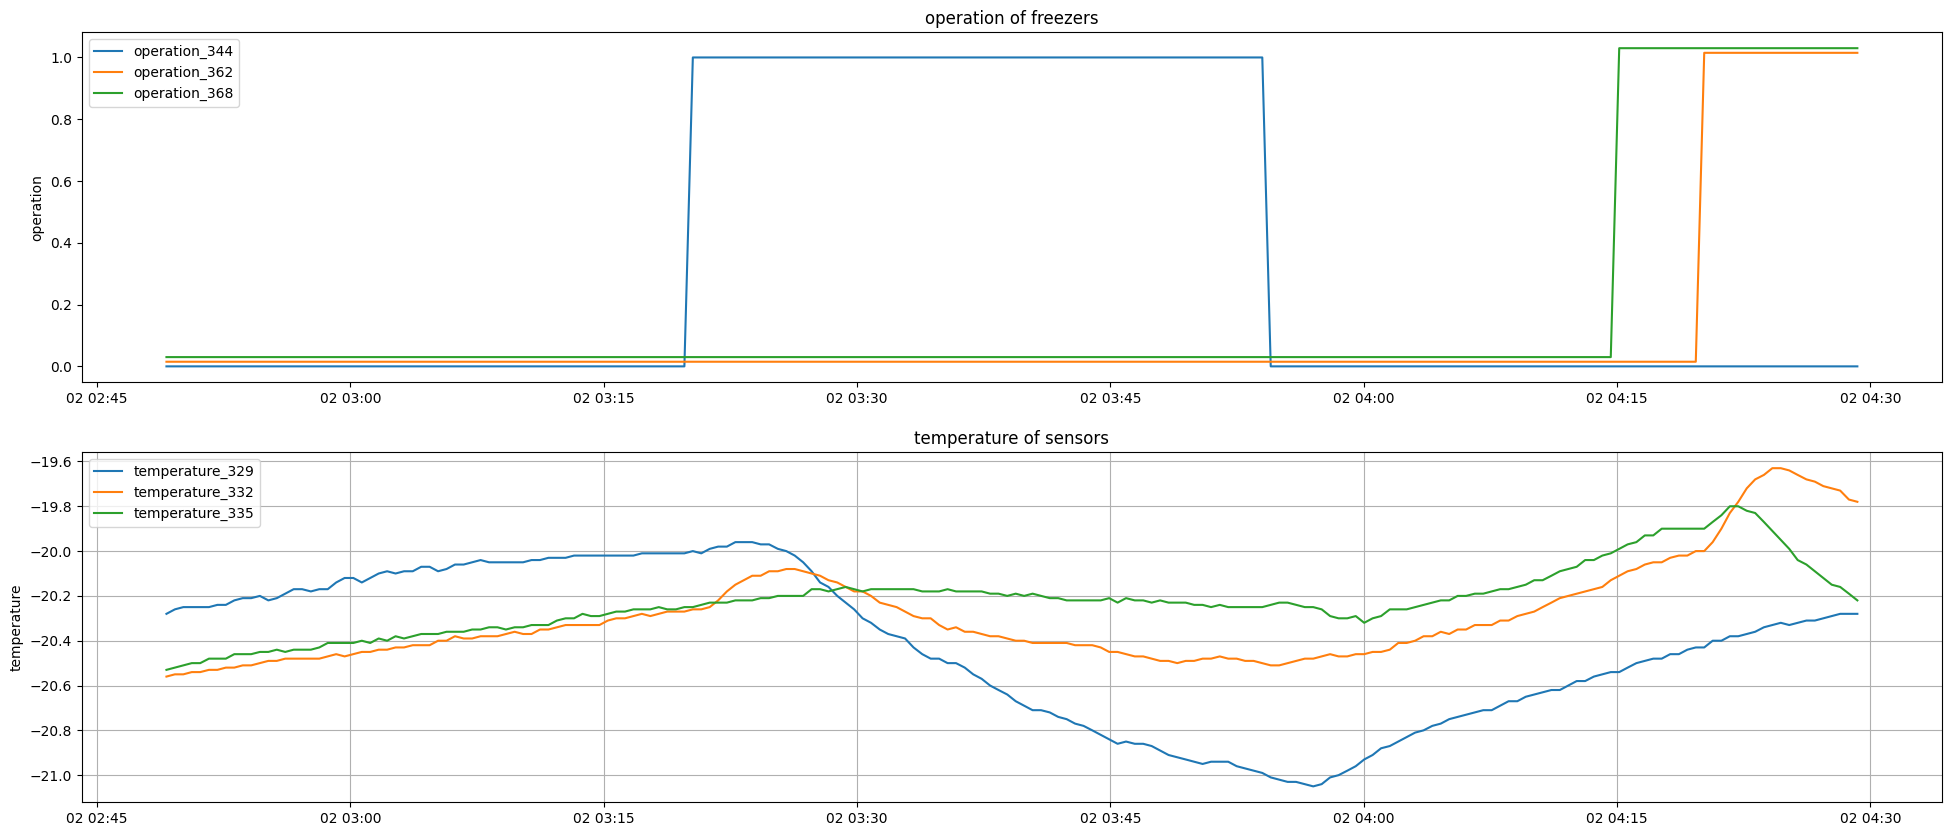

In [27]:
c2 = test_plot(3200,3400,df0)

In [28]:
df3 = df[['gw_time']+['dT_329']+['temperature_329']]
df3[df3['gw_time'].between('2021-02-02 03:15:00','2021-02-02 03:30:00')]

gw_time  dT_329  temperature_329
3252 2021-02-02 03:15:15    0.00           -20.02
3253 2021-02-02 03:15:45    0.00           -20.02
3254 2021-02-02 03:16:16    0.00           -20.02
3255 2021-02-02 03:16:46    0.00           -20.02
3256 2021-02-02 03:17:16    0.01           -20.01
3257 2021-02-02 03:17:46    0.00           -20.01
3258 2021-02-02 03:18:16    0.00           -20.01
3259 2021-02-02 03:18:46    0.00           -20.01
3260 2021-02-02 03:19:17    0.00           -20.01
3261 2021-02-02 03:19:47    0.00           -20.01
3262 2021-02-02 03:20:17    0.01           -20.00
3263 2021-02-02 03:20:47   -0.01           -20.01
3264 2021-02-02 03:21:17    0.02           -19.99
3265 2021-02-02 03:21:47    0.01           -19.98
3266 2021-02-02 03:22:18    0.00           -19.98
3267 2021-02-02 03:22:48    0.02           -19.96
3268 2021-02-02 03:23:18    0.00           -19.96
3269 2021-02-02 03:23:48    0.00           -19.96
3270 2021-02-02 03:24:18   -0.01           -19.97
3271 2021-02-02 03:24:48    0.00           -19.97
3272 2021-02-02 03:25:19   -0.02           -19.99
3273 2021-02-02 03:25:49   -0.01           -20.00
3274 2021-02-02 03:26:19   -0.02           -20.02
3275 2021-02-02 03:26:49   -0.03           -20.05
3276 2021-02-02 03:27:19   -0.04           -20.09
3277 2021-02-02 03:27:49   -0.05           -20.14
3278 2021-02-02 03:28:19   -0.02           -20.16
3279 2021-02-02 03:28:50   -0.04           -20.20
3280 2021-02-02 03:29:20   -0.03           -20.23
3281 2021-02-02 03:29:50   -0.03           -20.26

## Case4: [4400:4700]
- 센서 332 -20도에 도달해 냉각기 362 가동
- 센서 332 -21도에 도달해 냉각기 362 가동 중지
- Timedelta('0 days 02:30:31') 동안 가동
- 온도 상승 요인

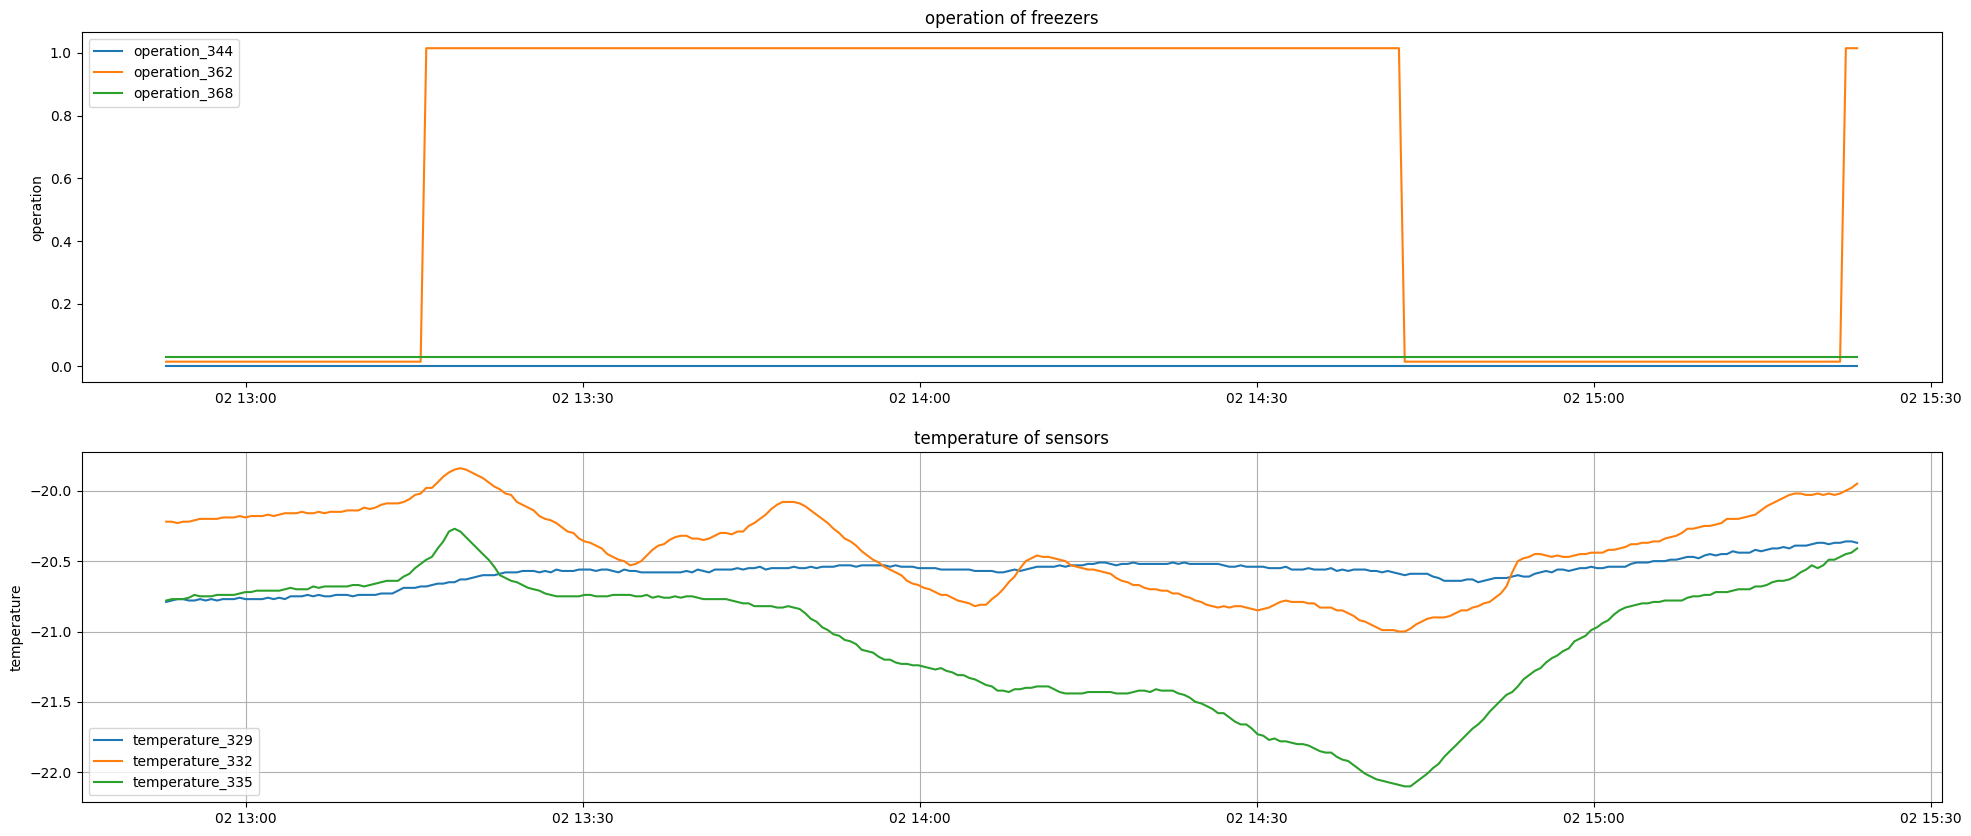

In [131]:
c2 = test_plot(4400,4700,df0)

In [29]:
df3 = df[['gw_time']+['dT_332']+['temperature_332']]
df3[df3['gw_time'].between('2021-02-02 13:00:00','2021-02-02 13:30:00')]

gw_time  dT_332  temperature_332
4415 2021-02-02 13:00:28    0.01           -20.18
4416 2021-02-02 13:00:58    0.00           -20.18
4417 2021-02-02 13:01:28    0.00           -20.18
4418 2021-02-02 13:01:59    0.01           -20.17
4419 2021-02-02 13:02:29   -0.01           -20.18
4420 2021-02-02 13:02:59    0.01           -20.17
4421 2021-02-02 13:03:29    0.01           -20.16
4422 2021-02-02 13:03:59    0.00           -20.16
4423 2021-02-02 13:04:30    0.00           -20.16
4424 2021-02-02 13:05:00    0.01           -20.15
4425 2021-02-02 13:05:30   -0.01           -20.16
4426 2021-02-02 13:06:00    0.00           -20.16
4427 2021-02-02 13:06:30    0.01           -20.15
4428 2021-02-02 13:07:01   -0.01           -20.16
4429 2021-02-02 13:07:31    0.01           -20.15
4430 2021-02-02 13:08:01    0.00           -20.15
4431 2021-02-02 13:08:31    0.00           -20.15
4432 2021-02-02 13:09:01    0.01           -20.14
4433 2021-02-02 13:09:32    0.00           -20.14
4434 2021-02-02 13:10:02    0.00           -20.14
4435 2021-02-02 13:10:32    0.02           -20.12
4436 2021-02-02 13:11:02   -0.01           -20.13
4437 2021-02-02 13:11:32    0.01           -20.12
4438 2021-02-02 13:12:03    0.02           -20.10
4439 2021-02-02 13:12:33    0.01           -20.09
4440 2021-02-02 13:13:03    0.00           -20.09
4441 2021-02-02 13:13:33    0.00           -20.09
4442 2021-02-02 13:14:03    0.01           -20.08
4443 2021-02-02 13:14:34    0.02           -20.06
4444 2021-02-02 13:15:04    0.03           -20.03
4445 2021-02-02 13:15:34    0.01           -20.02
4446 2021-02-02 13:16:04    0.04           -19.98
4447 2021-02-02 13:16:34    0.00           -19.98
4448 2021-02-02 13:17:05    0.04           -19.94
4449 2021-02-02 13:17:35    0.04           -19.90
4450 2021-02-02 13:18:05    0.03           -19.87
4451 2021-02-02 13:18:35    0.02           -19.85
4452 2021-02-02 13:19:06    0.01           -19.84
4453 2021-02-02 13:19:36   -0.01           -19.85
4454 2021-02-02 13:20:06   -0.02           -19.87
4455 2021-02-02 13:20:36   -0.02           -19.89
4456 2021-02-02 13:21:06   -0.02           -19.91
4457 2021-02-02 13:21:37   -0.03           -19.94
4458 2021-02-02 13:22:07   -0.03           -19.97
4459 2021-02-02 13:22:37   -0.02           -19.99
4460 2021-02-02 13:23:07   -0.03           -20.02
4461 2021-02-02 13:23:37   -0.01           -20.03
4462 2021-02-02 13:24:08   -0.05           -20.08
4463 2021-02-02 13:24:38   -0.02           -20.10
4464 2021-02-02 13:25:08   -0.02           -20.12
4465 2021-02-02 13:25:38   -0.02           -20.14
4466 2021-02-02 13:26:08   -0.04           -20.18
4467 2021-02-02 13:26:39   -0.02           -20.20
4468 2021-02-02 13:27:09   -0.01           -20.21
4469 2021-02-02 13:27:39   -0.02           -20.23
4470 2021-02-02 13:28:09   -0.03           -20.26
4471 2021-02-02 13:28:39   -0.03           -20.29
4472 2021-02-02 13:29:10   -0.01           -20.30
4473 2021-02-02 13:29:40   -0.04           -20.34

In [132]:
list(c2['gw_time'])[-1] - list(c2['gw_time'])[0]

Timedelta('0 days 02:30:31')

## Case4: [21700:22200]
- 센서 329 -20도에 도달해 냉각기 344 가동
- 센서 329 -21도에 도달해 냉각기 344 가동 중지
- 0 days 02:52:25 동안 켜져있음

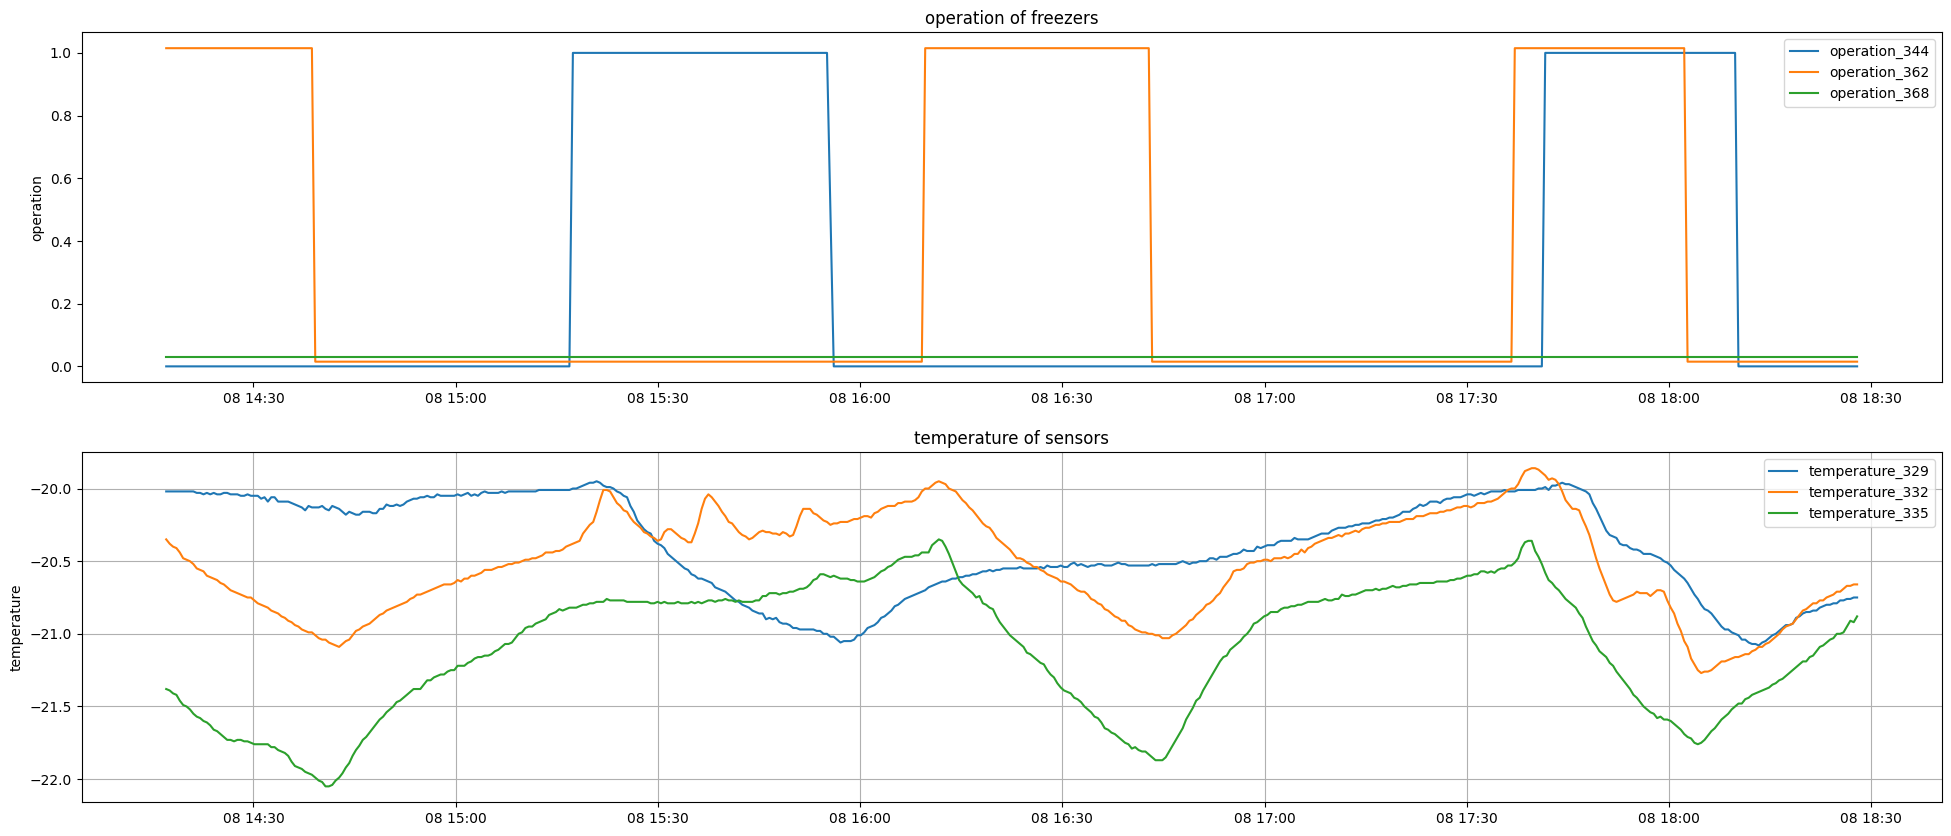

In [133]:
c2 = test_plot(21700,22200,df0)

In [30]:
df3 = df[['gw_time']+['dT_329']+['temperature_329']]
df3[df3['gw_time'].between('2021-02-08 15:00:00','2021-02-08 15:30:00')]

gw_time  dT_329  temperature_329
21786 2021-02-08 15:00:17    0.01           -20.04
21787 2021-02-08 15:00:47   -0.01           -20.05
21788 2021-02-08 15:01:17    0.01           -20.04
21789 2021-02-08 15:01:48    0.01           -20.03
21790 2021-02-08 15:02:18   -0.02           -20.05
21791 2021-02-08 15:02:48    0.01           -20.04
21792 2021-02-08 15:03:18   -0.01           -20.05
21793 2021-02-08 15:03:48    0.02           -20.03
21794 2021-02-08 15:04:18    0.01           -20.02
21795 2021-02-08 15:04:49   -0.01           -20.03
21796 2021-02-08 15:05:19    0.00           -20.03
21797 2021-02-08 15:05:49    0.00           -20.03
21798 2021-02-08 15:06:19    0.00           -20.03
21799 2021-02-08 15:06:49    0.01           -20.02
21800 2021-02-08 15:07:19   -0.01           -20.03
21801 2021-02-08 15:07:50    0.01           -20.02
21802 2021-02-08 15:08:20    0.00           -20.02
21803 2021-02-08 15:08:50    0.00           -20.02
21804 2021-02-08 15:09:20    0.00           -20.02
21805 2021-02-08 15:09:50    0.00           -20.02
21806 2021-02-08 15:10:20    0.00           -20.02
21807 2021-02-08 15:10:50    0.00           -20.02
21808 2021-02-08 15:11:21    0.00           -20.02
21809 2021-02-08 15:11:51    0.00           -20.02
21810 2021-02-08 15:12:21    0.01           -20.01
21811 2021-02-08 15:12:51    0.00           -20.01
21812 2021-02-08 15:13:21    0.00           -20.01
21813 2021-02-08 15:13:51    0.00           -20.01
21814 2021-02-08 15:14:22    0.00           -20.01
21815 2021-02-08 15:14:52    0.00           -20.01
21816 2021-02-08 15:15:22    0.00           -20.01
21817 2021-02-08 15:15:52    0.00           -20.01
21818 2021-02-08 15:16:22    0.00           -20.01
21819 2021-02-08 15:16:52    0.00           -20.01
21820 2021-02-08 15:17:23    0.01           -20.00
21821 2021-02-08 15:17:53    0.00           -20.00
21822 2021-02-08 15:18:23    0.01           -19.99
21823 2021-02-08 15:18:53    0.01           -19.98
21824 2021-02-08 15:19:23    0.01           -19.97
21825 2021-02-08 15:19:53    0.01           -19.96
21826 2021-02-08 15:20:24    0.00           -19.96
21827 2021-02-08 15:20:54    0.01           -19.95
21828 2021-02-08 15:21:24   -0.01           -19.96
21829 2021-02-08 15:21:54   -0.02           -19.98
21830 2021-02-08 15:22:24   -0.01           -19.99
21831 2021-02-08 15:22:54    0.00           -19.99
21832 2021-02-08 15:23:24   -0.01           -20.00
21833 2021-02-08 15:23:55   -0.02           -20.02
21834 2021-02-08 15:24:25   -0.01           -20.03
21835 2021-02-08 15:24:55   -0.02           -20.05
21836 2021-02-08 15:25:25   -0.01           -20.06
21837 2021-02-08 15:25:55   -0.06           -20.12
21838 2021-02-08 15:26:25   -0.04           -20.16
21839 2021-02-08 15:26:56   -0.06           -20.22
21840 2021-02-08 15:27:26   -0.03           -20.25
21841 2021-02-08 15:27:56   -0.03           -20.28
21842 2021-02-08 15:28:26   -0.02           -20.30
21843 2021-02-08 15:28:56   -0.01           -20.31
21844 2021-02-08 15:29:26   -0.05           -20.36
21845 2021-02-08 15:29:57   -0.02           -20.38

In [134]:
c2 = c2[c2['operation_344']==1]
print(list(c2['gw_time'])[-1] - list(c2['gw_time'])[0])

0 days 02:52:25


## Case5: [21700:22200]
- 센서 332 -20도에 도달해 냉각기 362 가동
- 센서 332 -21도에 도달해 냉각기 362 가동 중지
- 0 days 03:45:12

## 모든 case 추출

In [253]:
df_zero_one = df.loc[(df['operation_344']+df['operation_362']+df['operation_368'] == 1)|(df['operation_344']+df['operation_362']+df['operation_368'] == 0)]

In [254]:
df1 = pd.merge(df_time, df_zero_one, how = 'outer', on = 'gw_time')

Plotting 0:10000


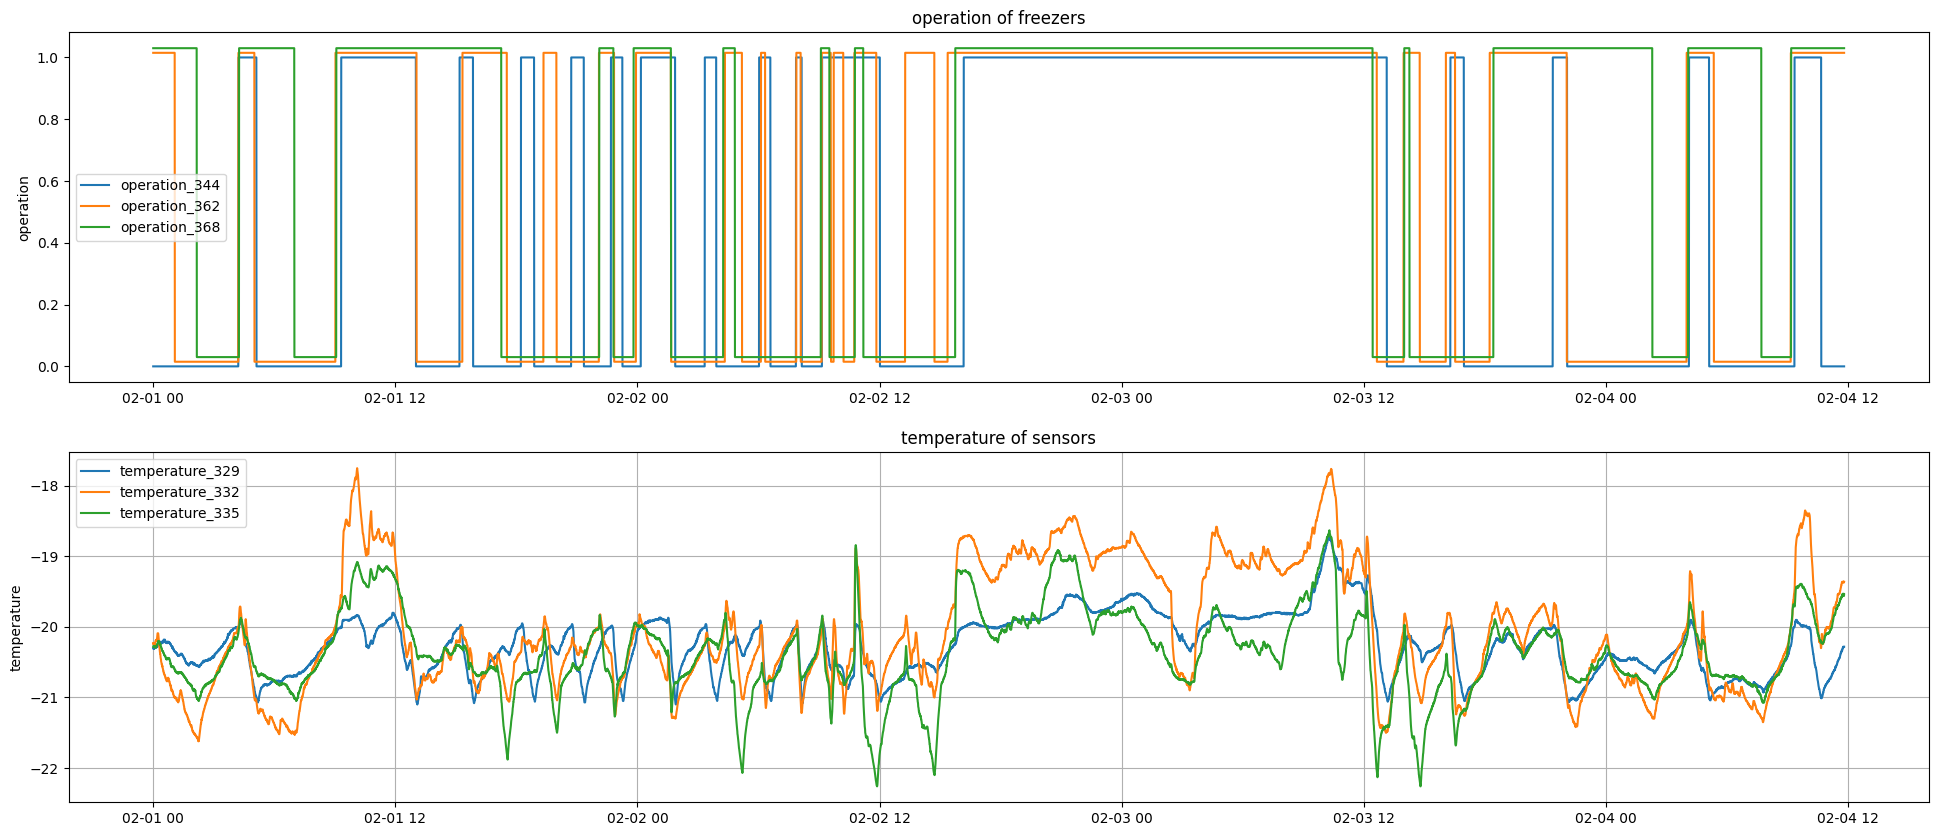

Plotting 10000:20000


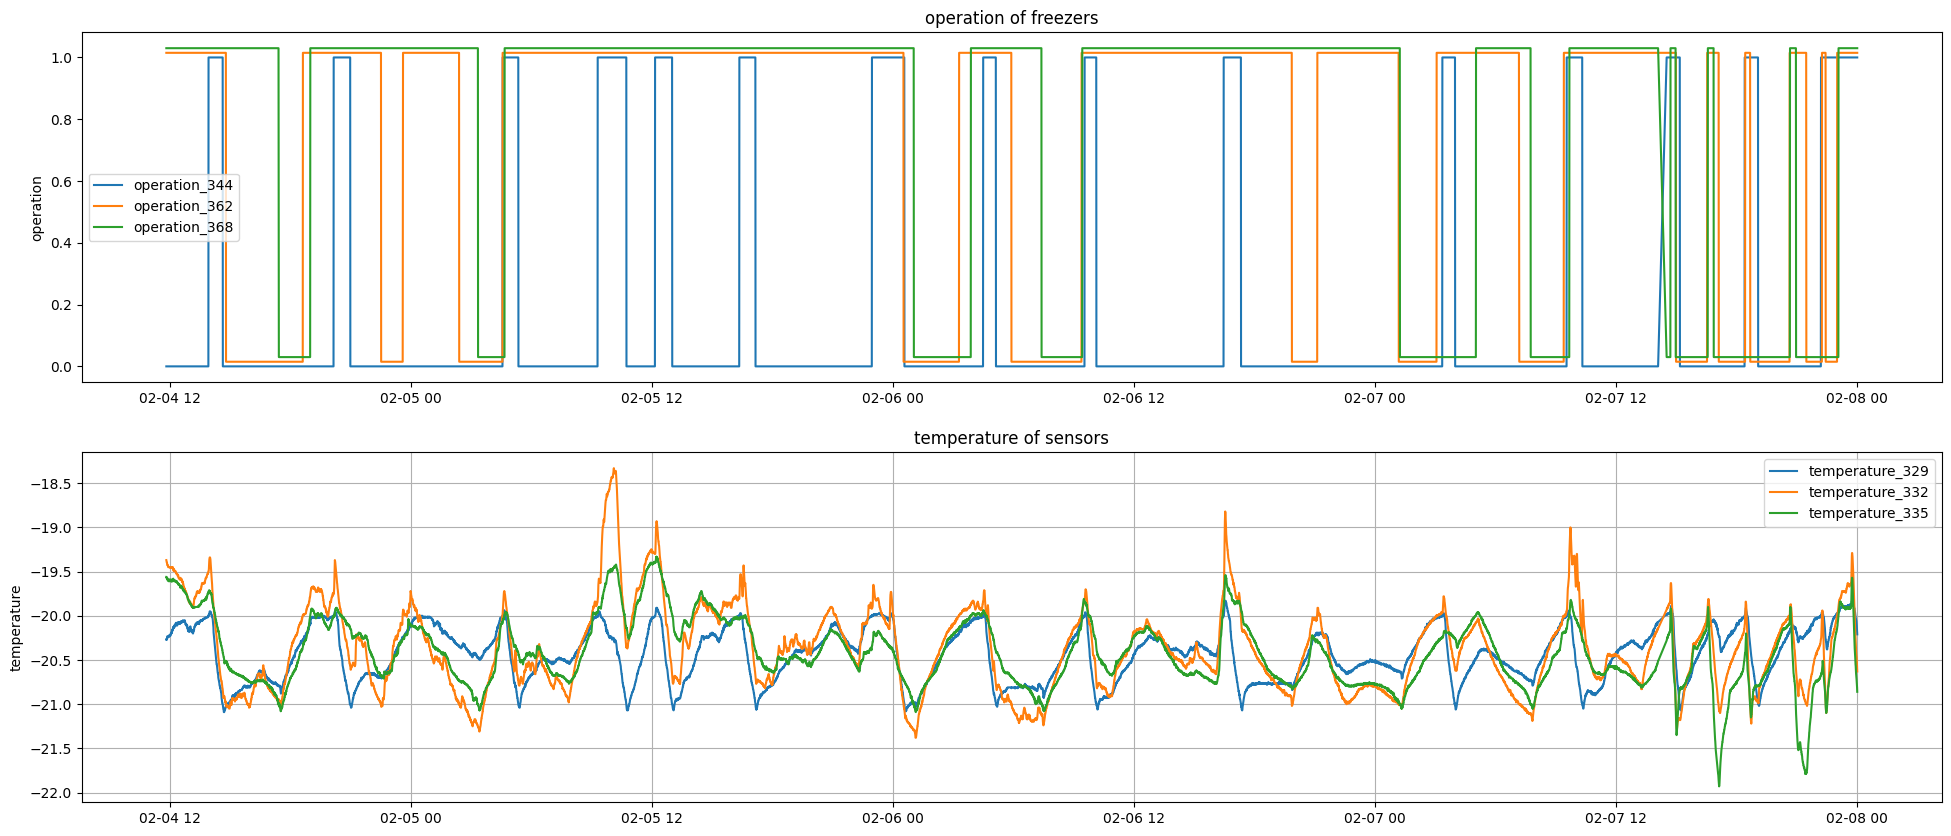

Plotting 20000:30000


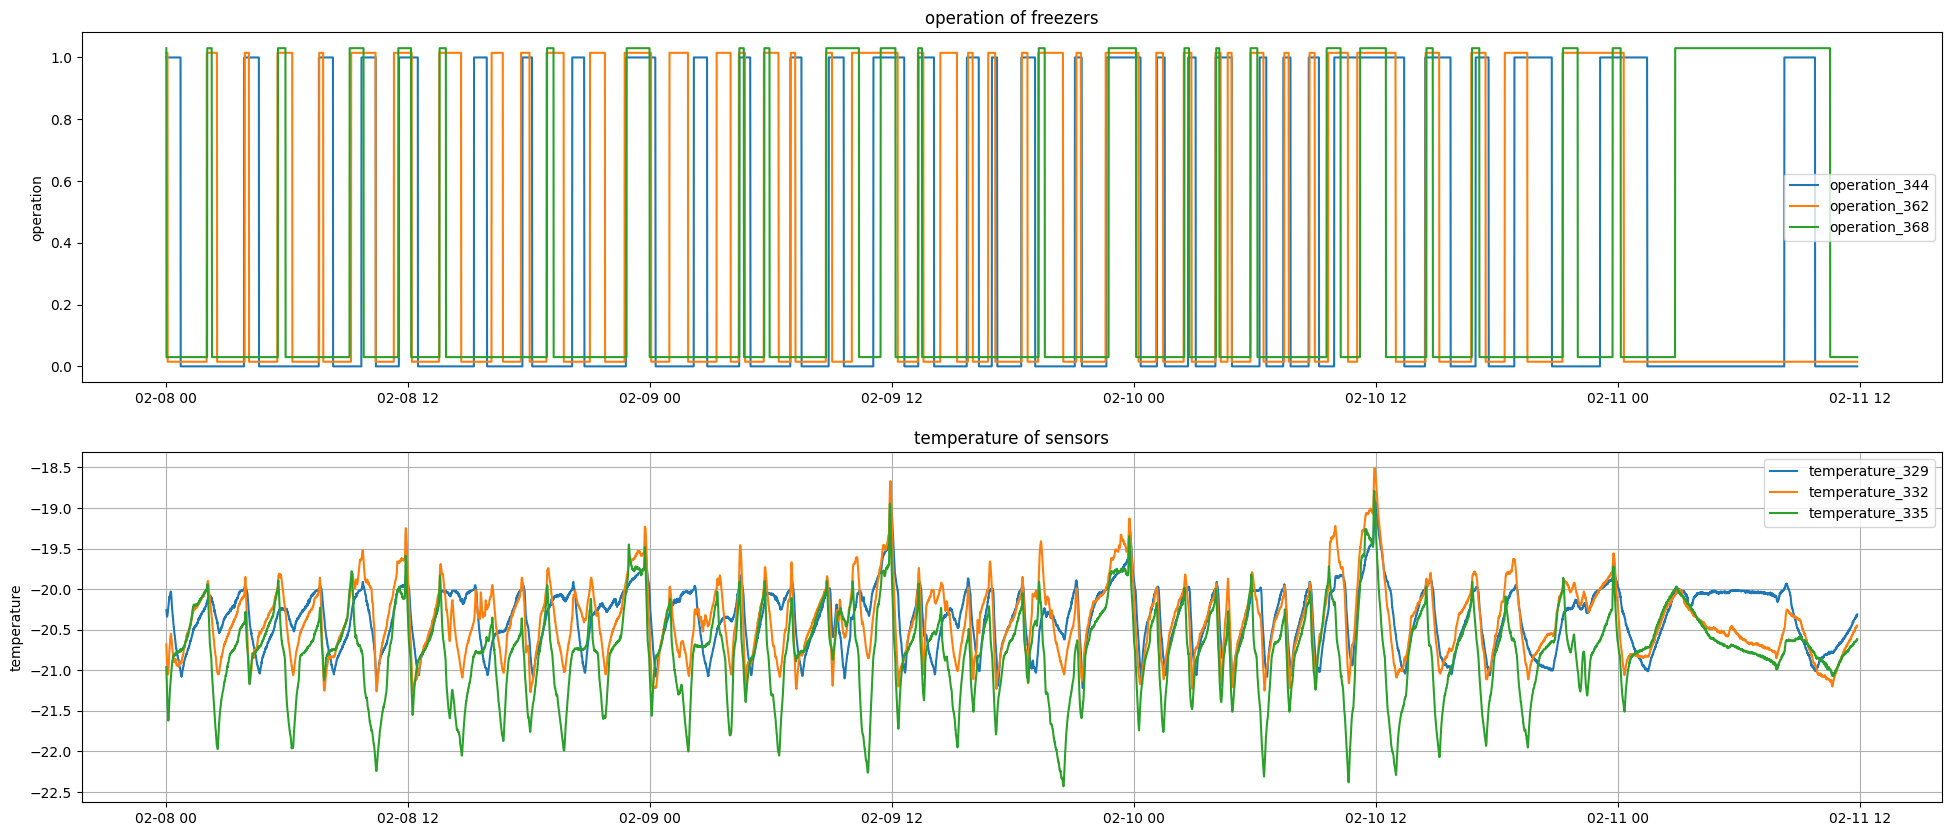

Plotting 30000:40000


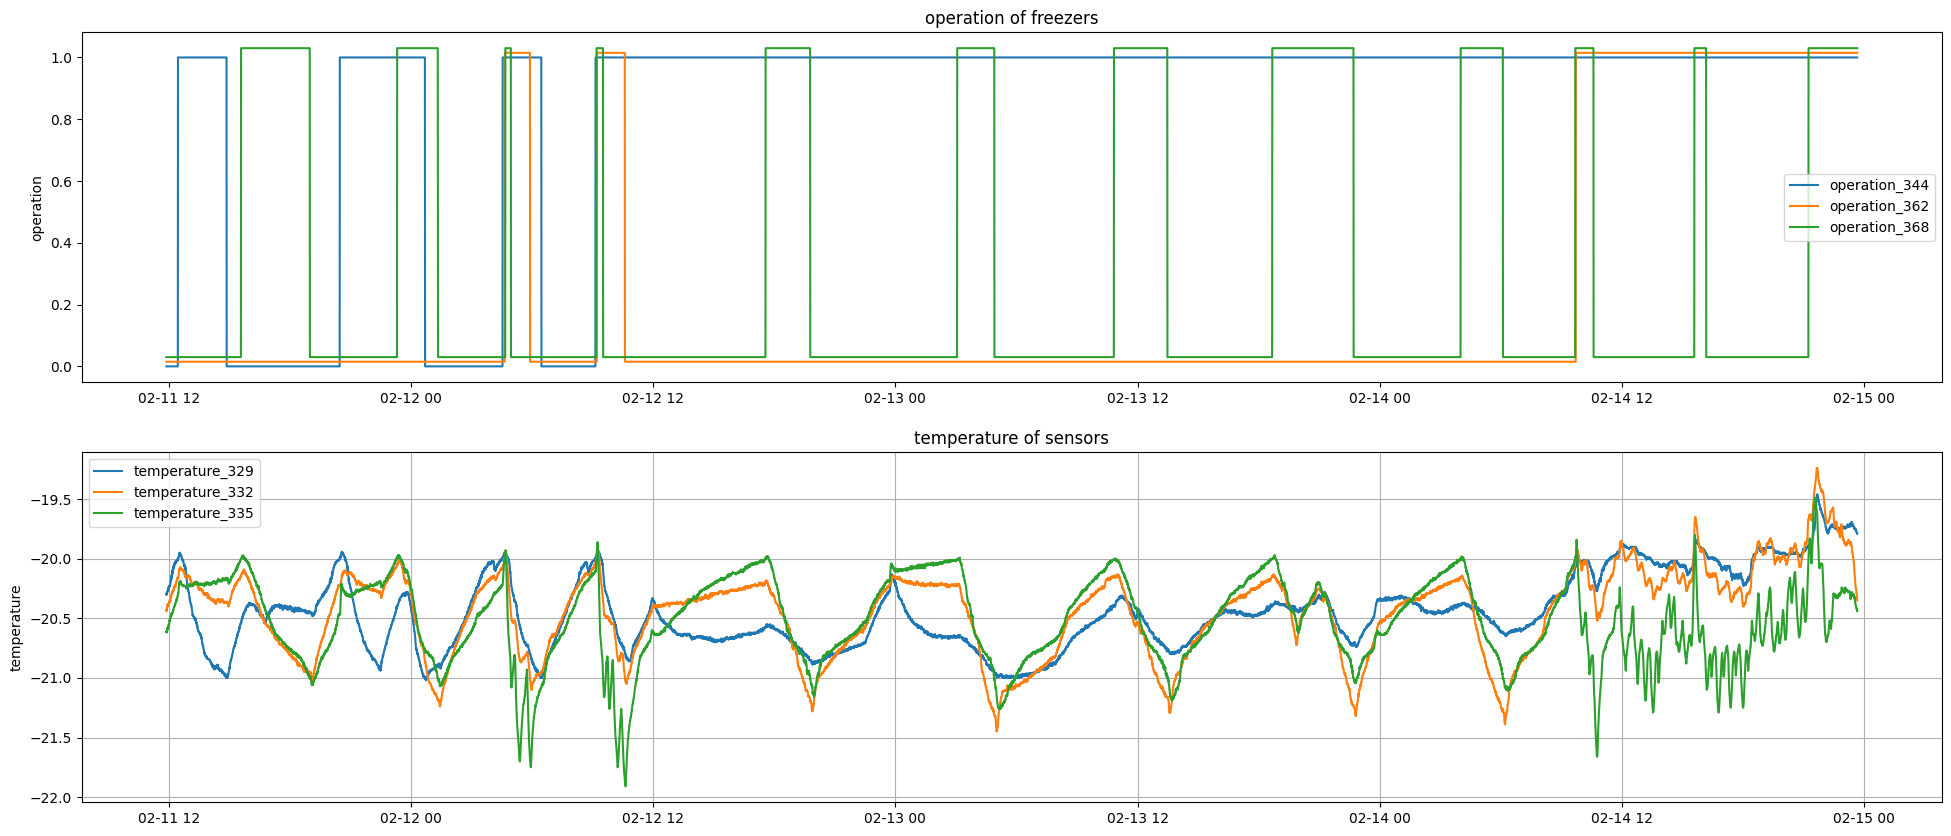

Plotting 40000:50000


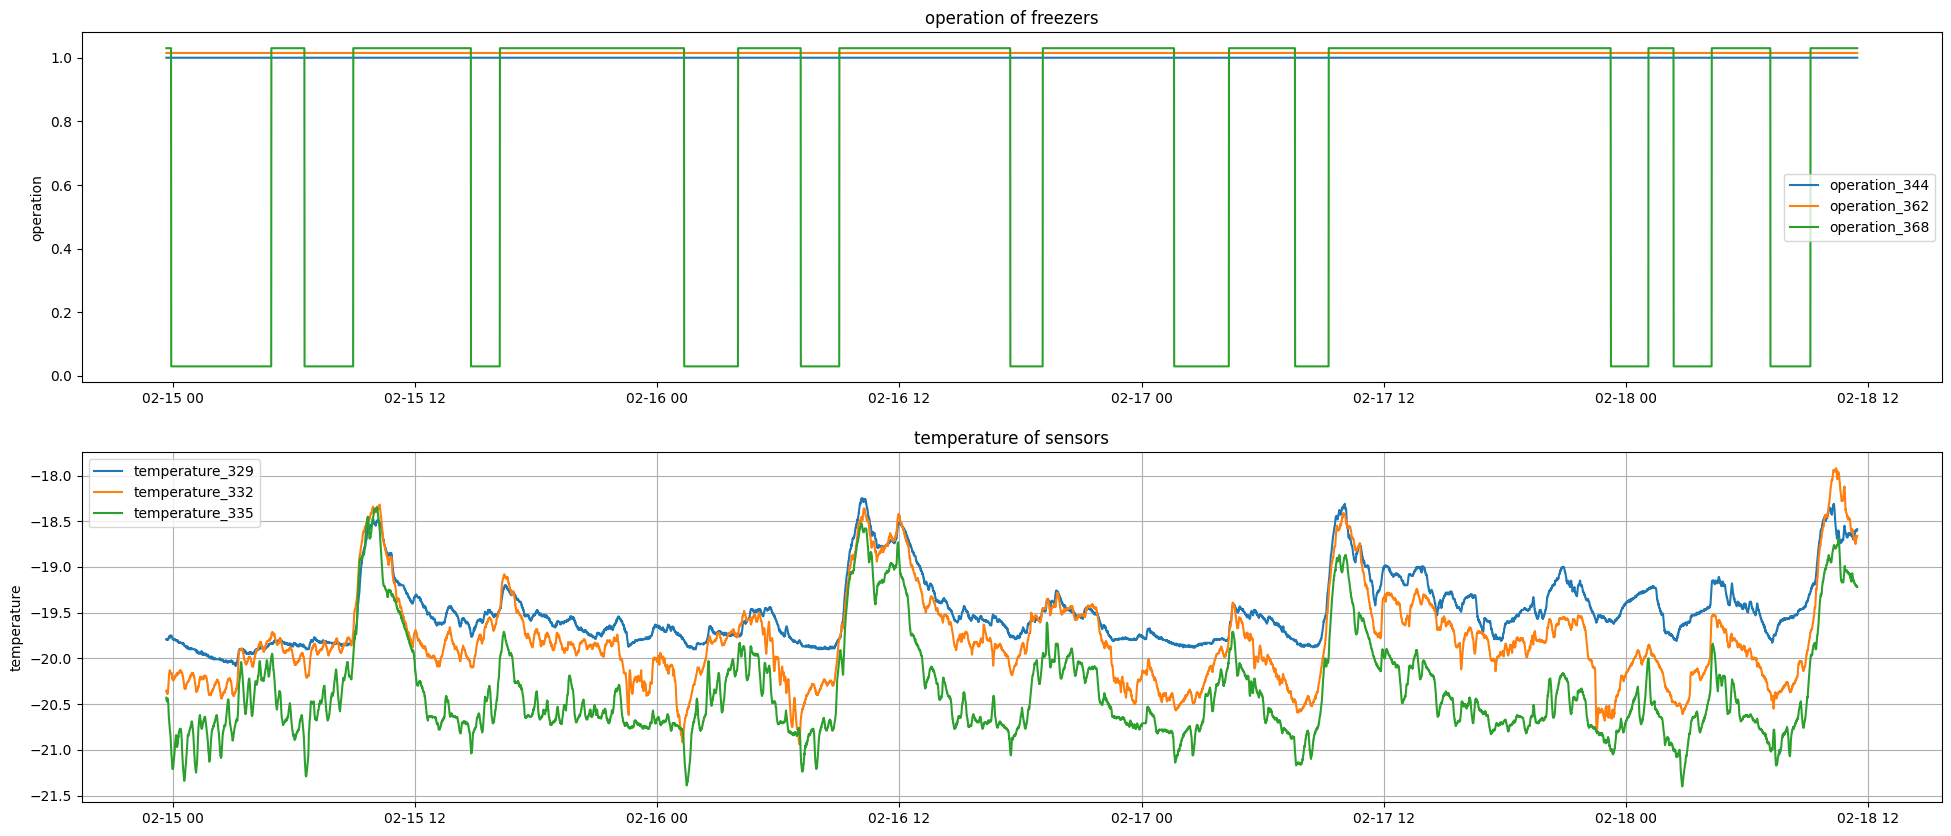

Plotting 50000:60000


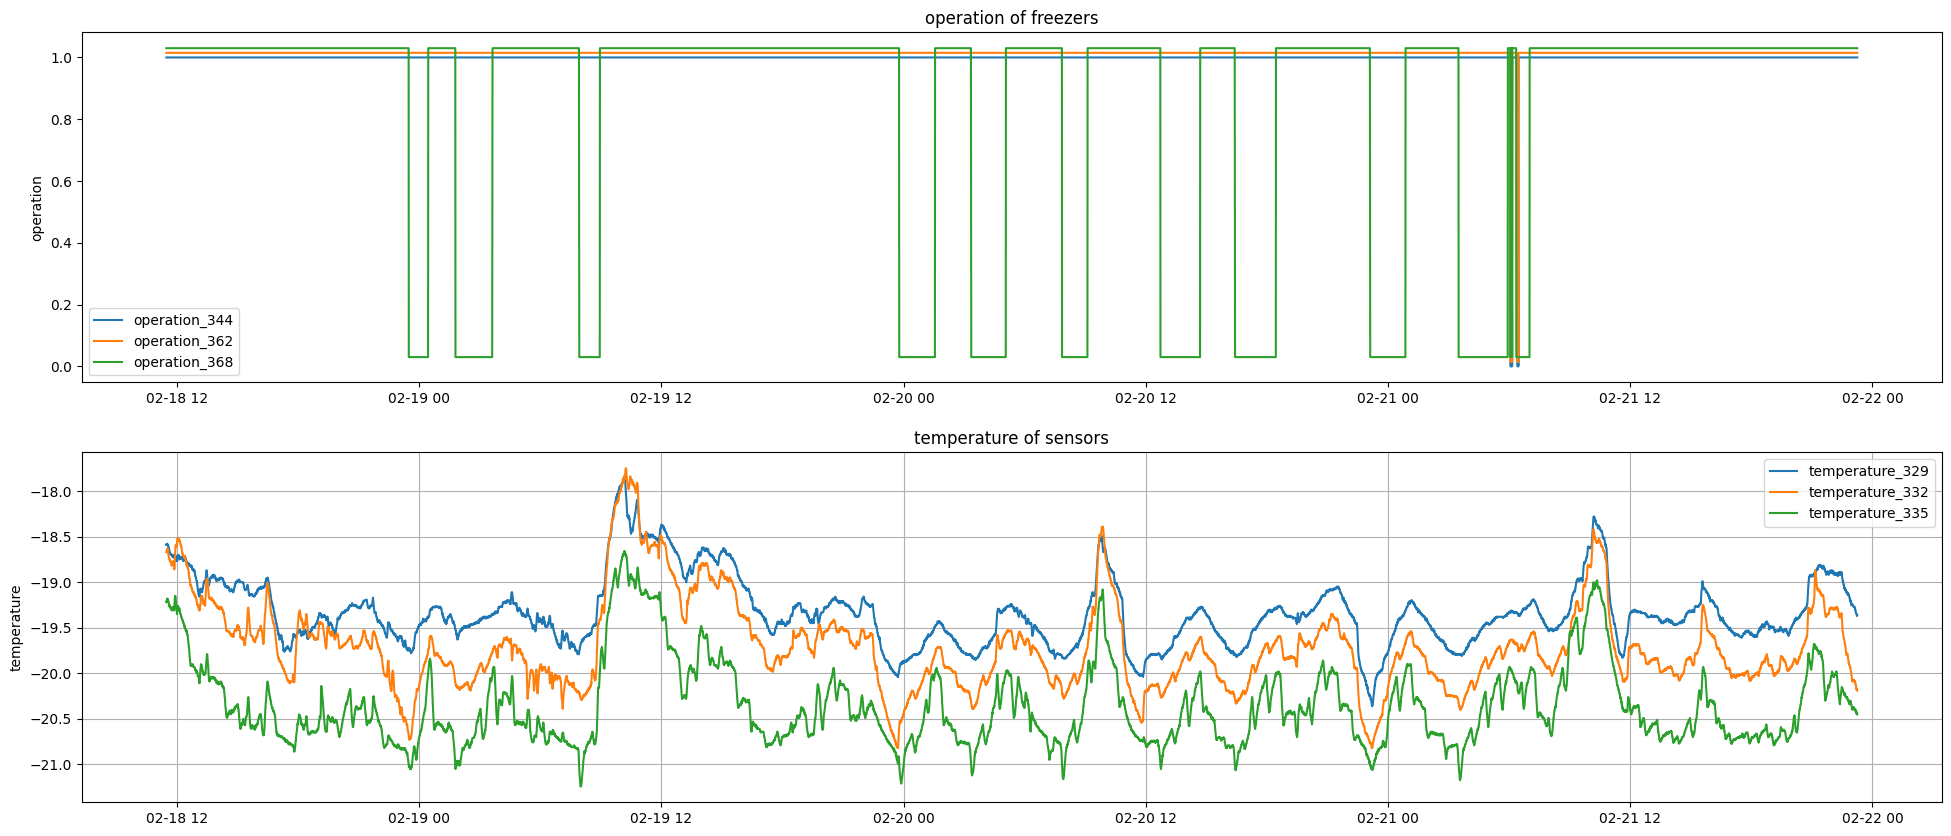

Plotting 60000:70000


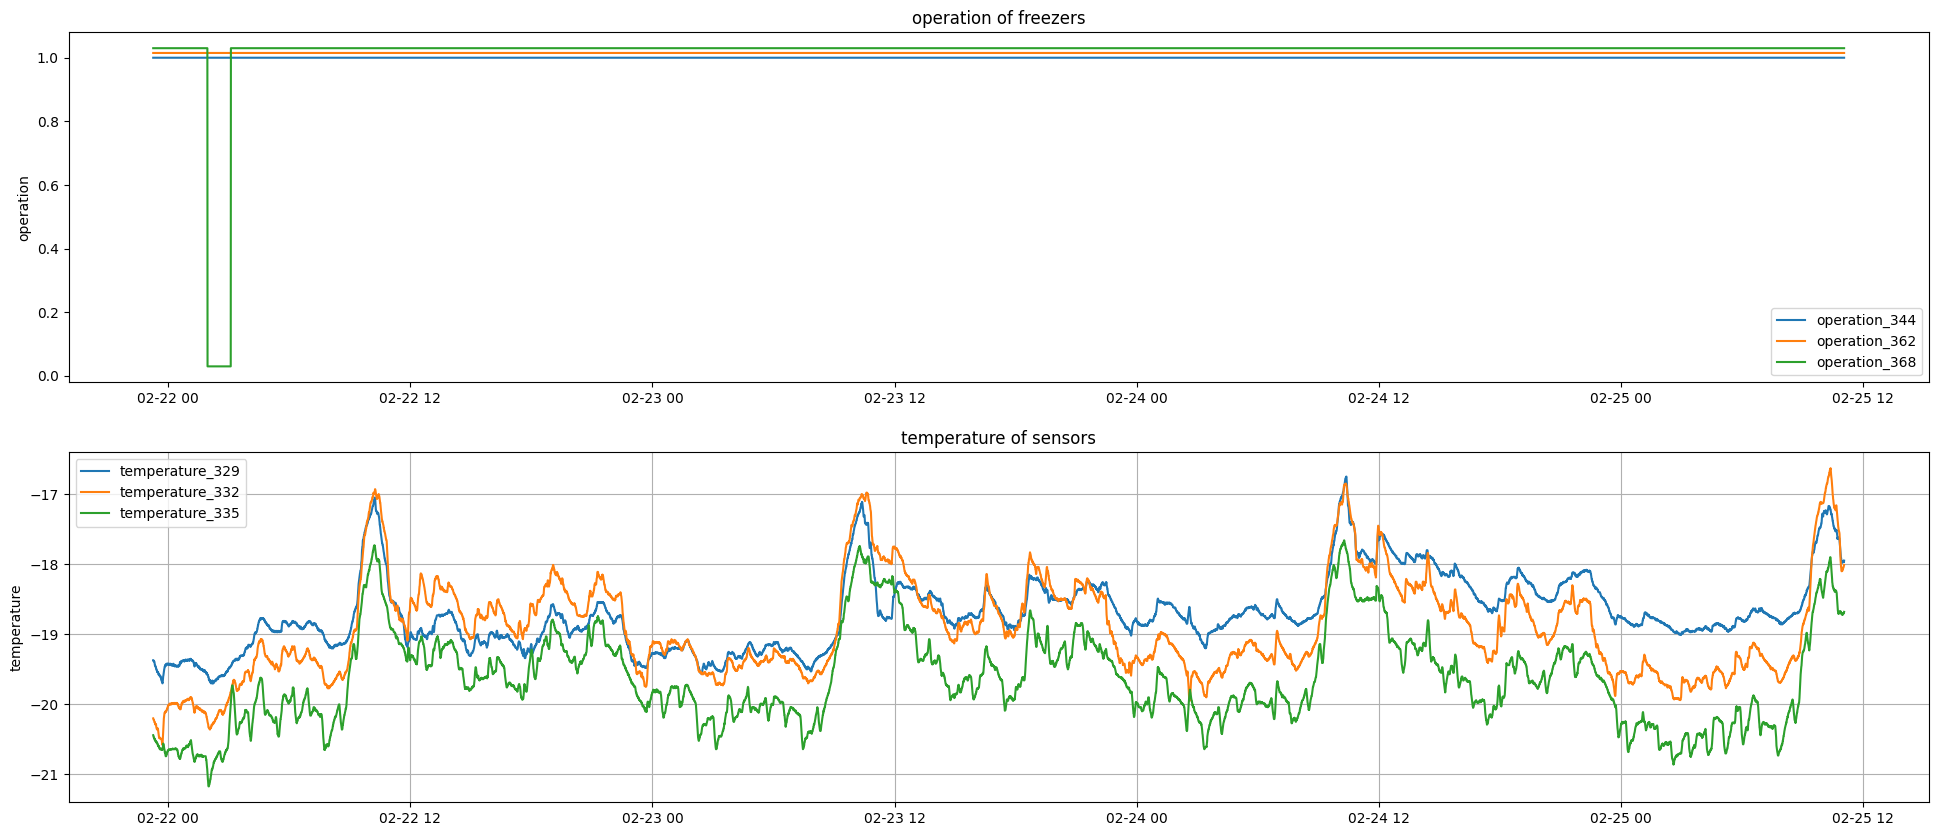

Plotting 70000:80000


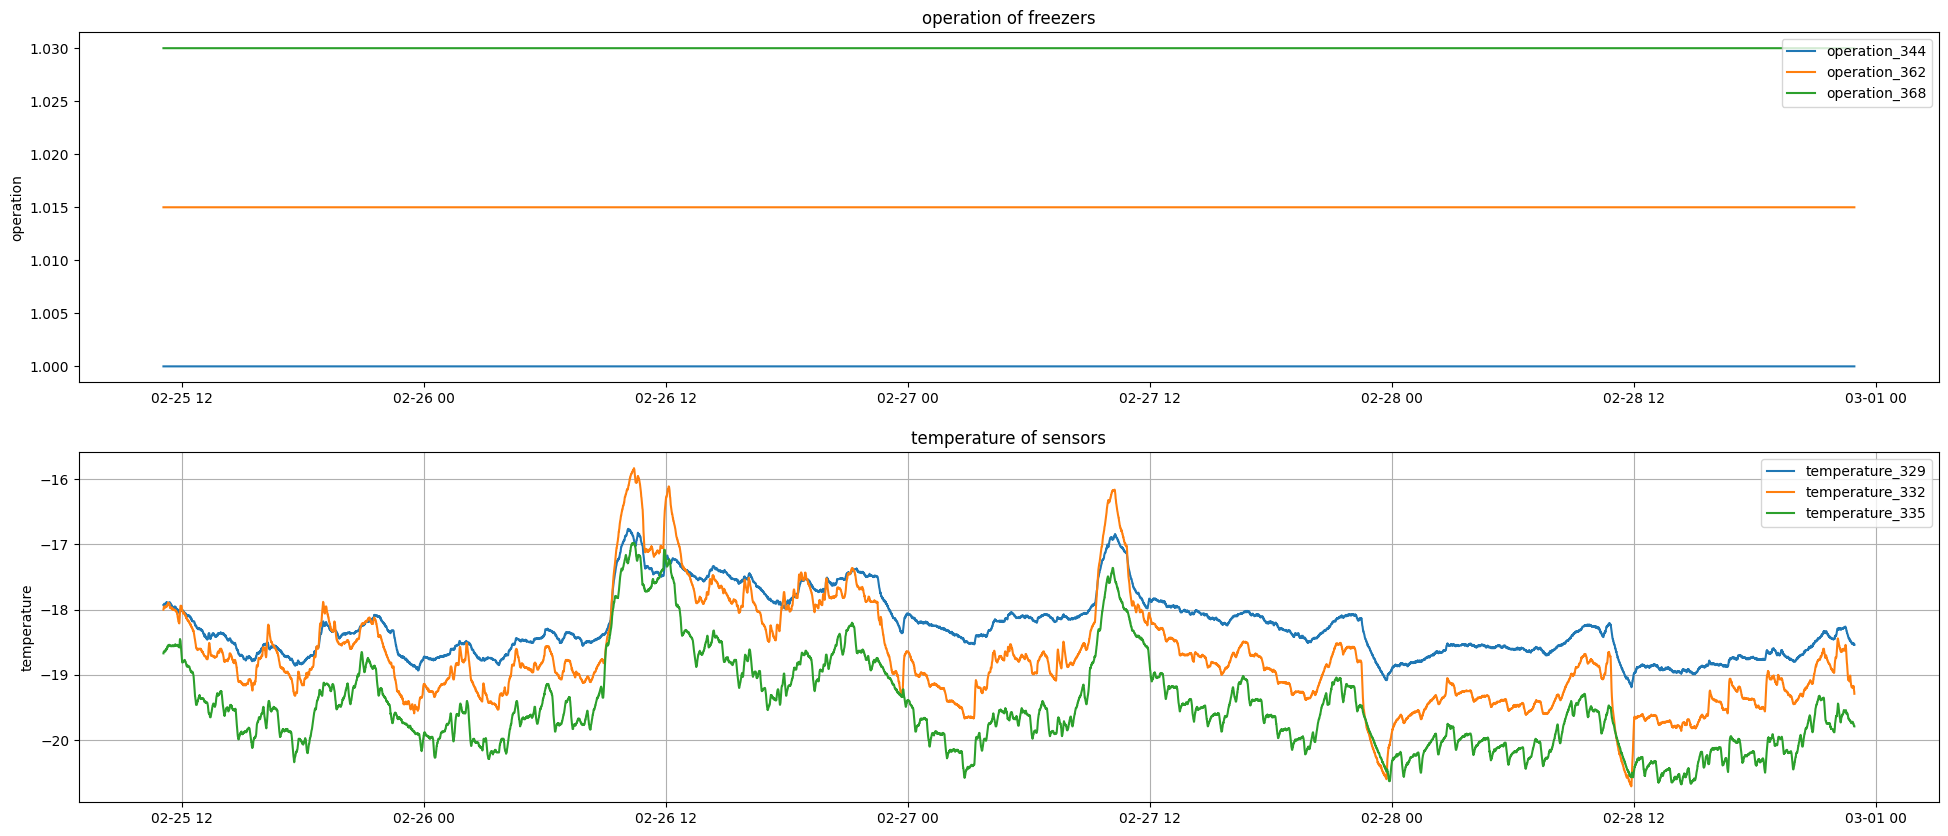

In [255]:
for i in range(0,8):
    test_plot(i*10000,(i+1)*10000, df)

Plotting 0:10000


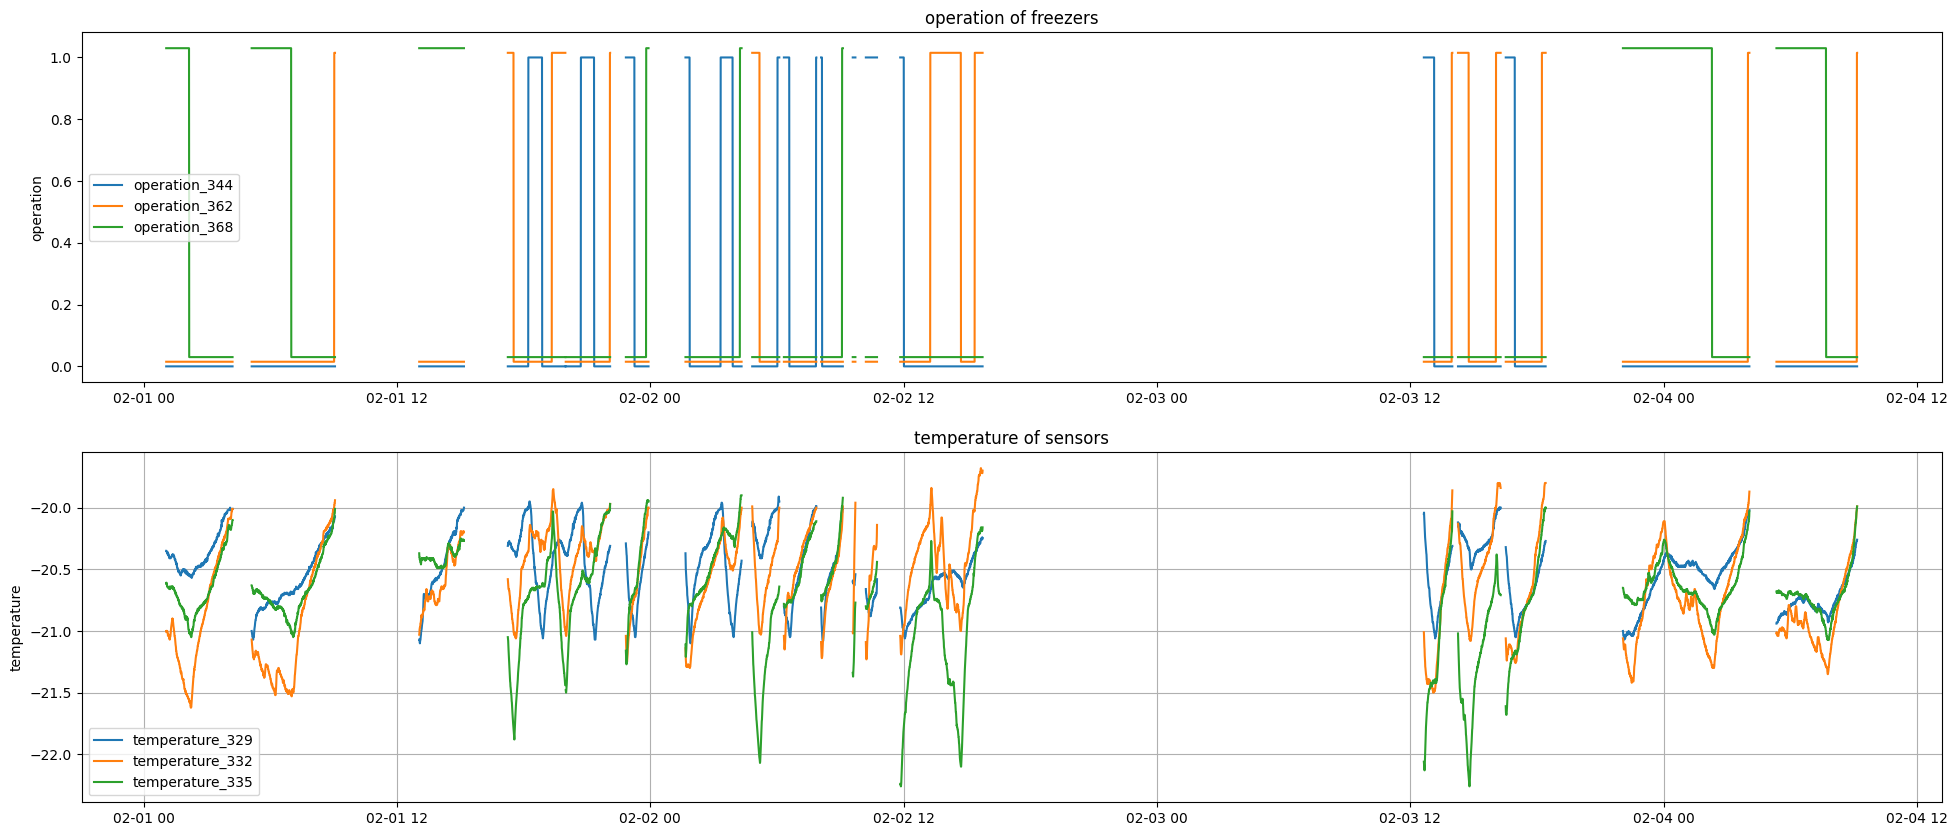

Plotting 10000:20000


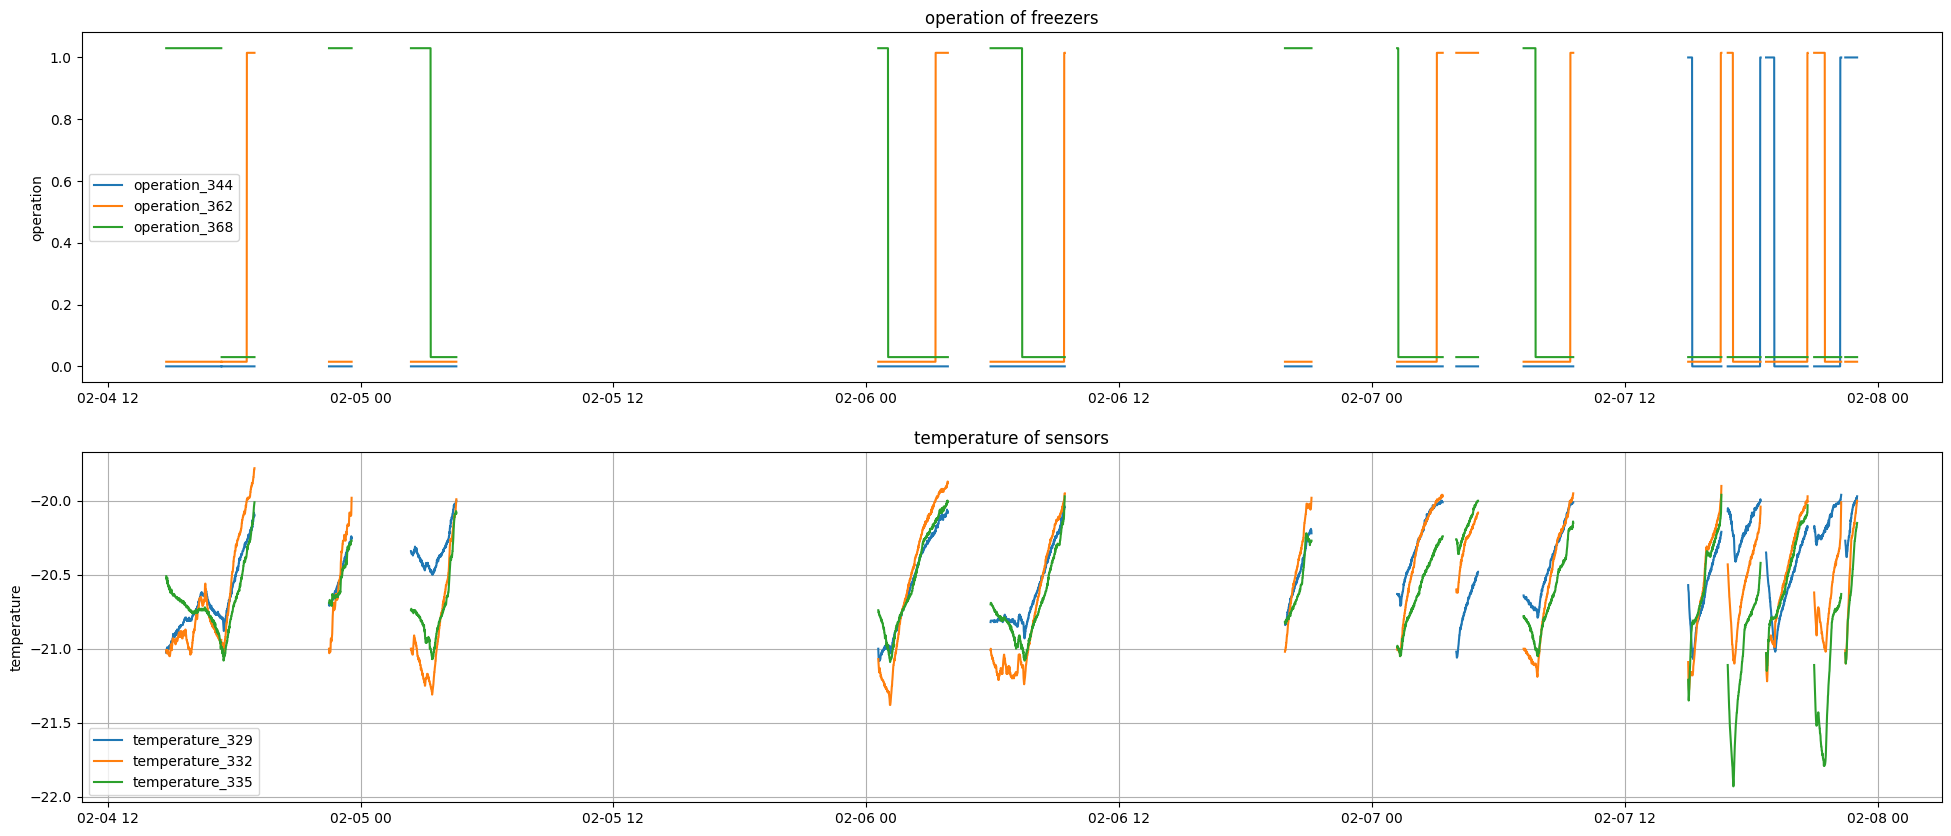

Plotting 20000:30000


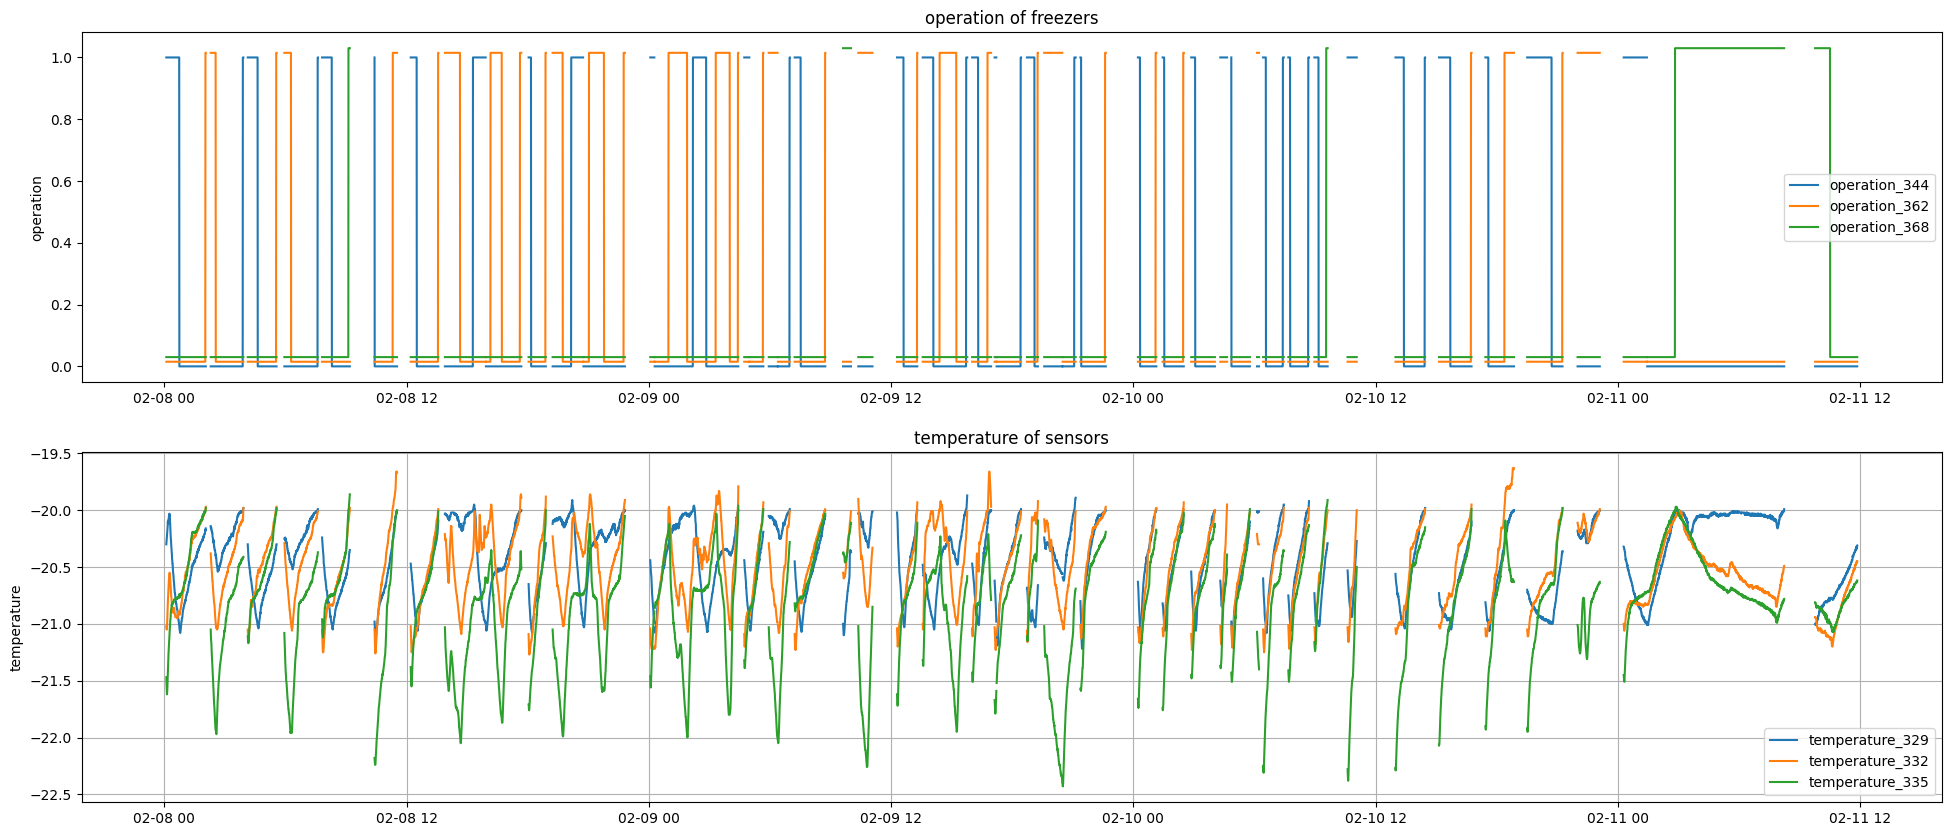

Plotting 30000:40000


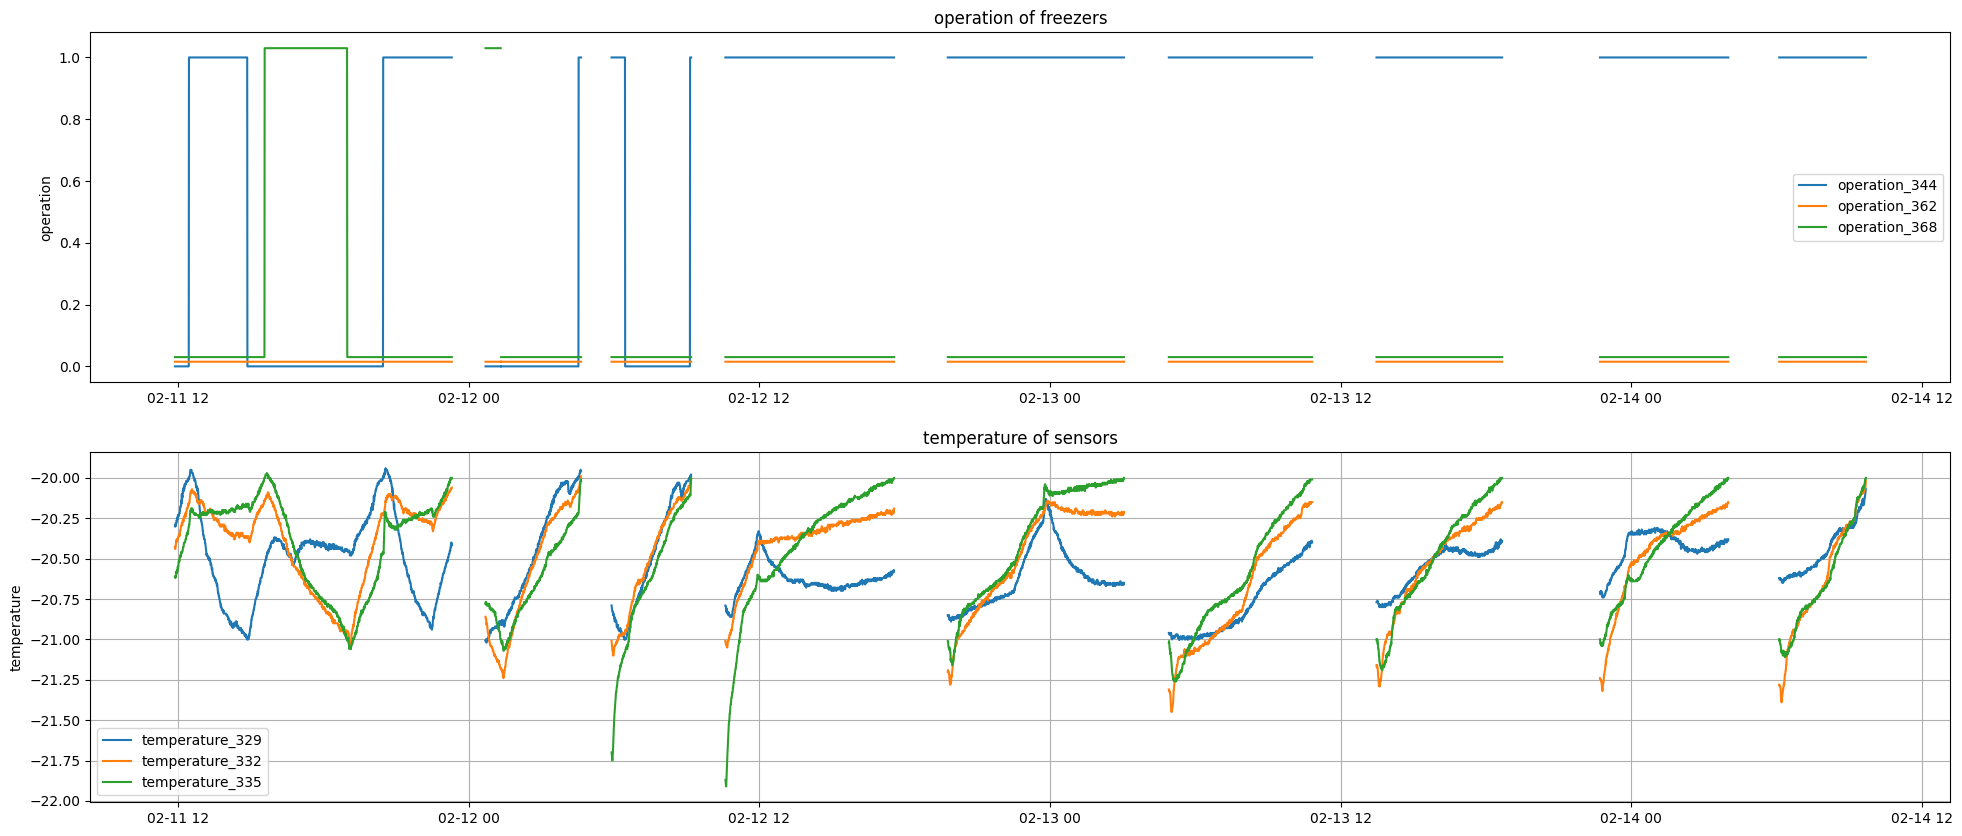

Plotting 40000:50000


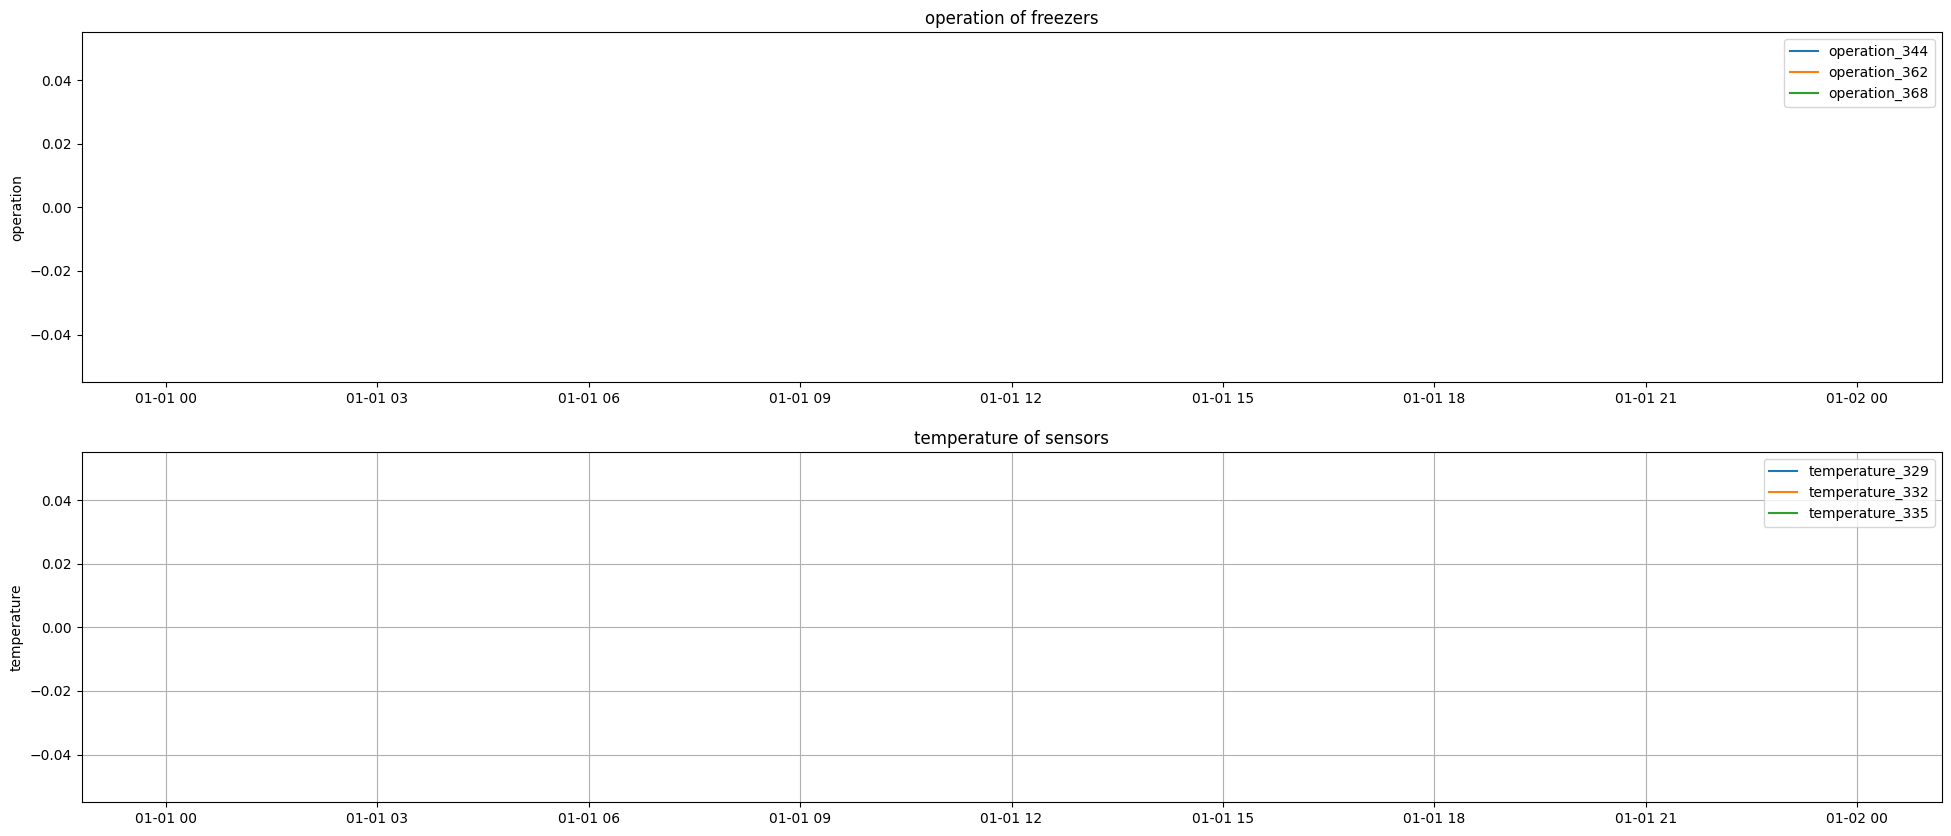

Plotting 50000:60000


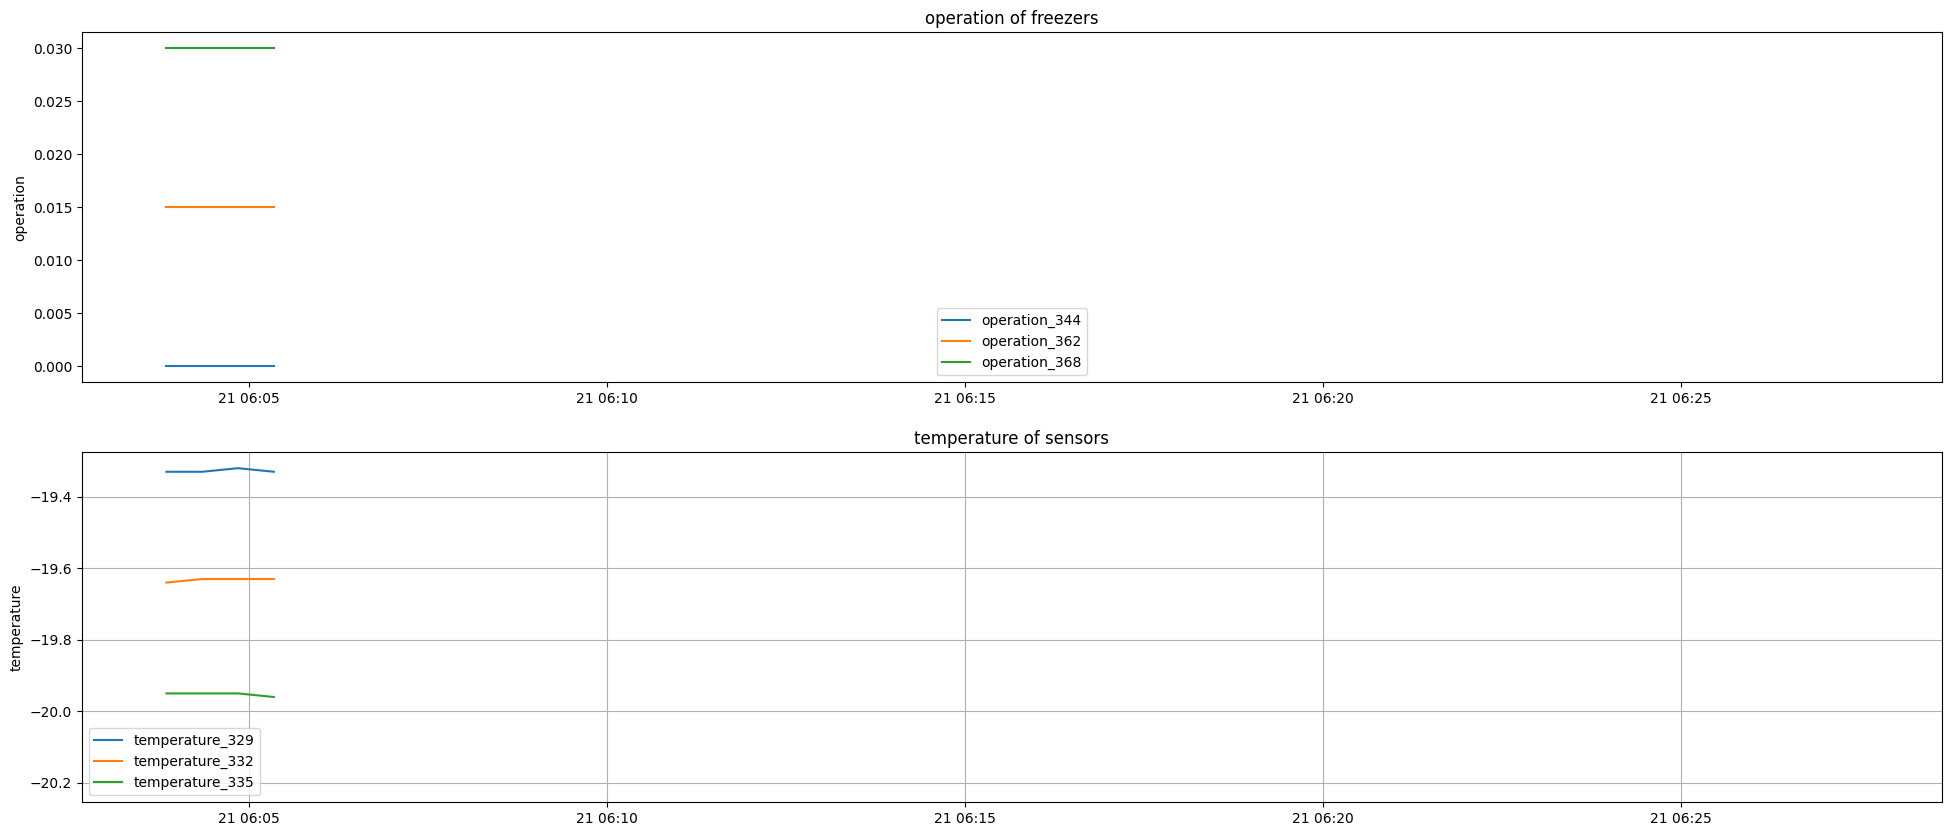

Plotting 60000:70000


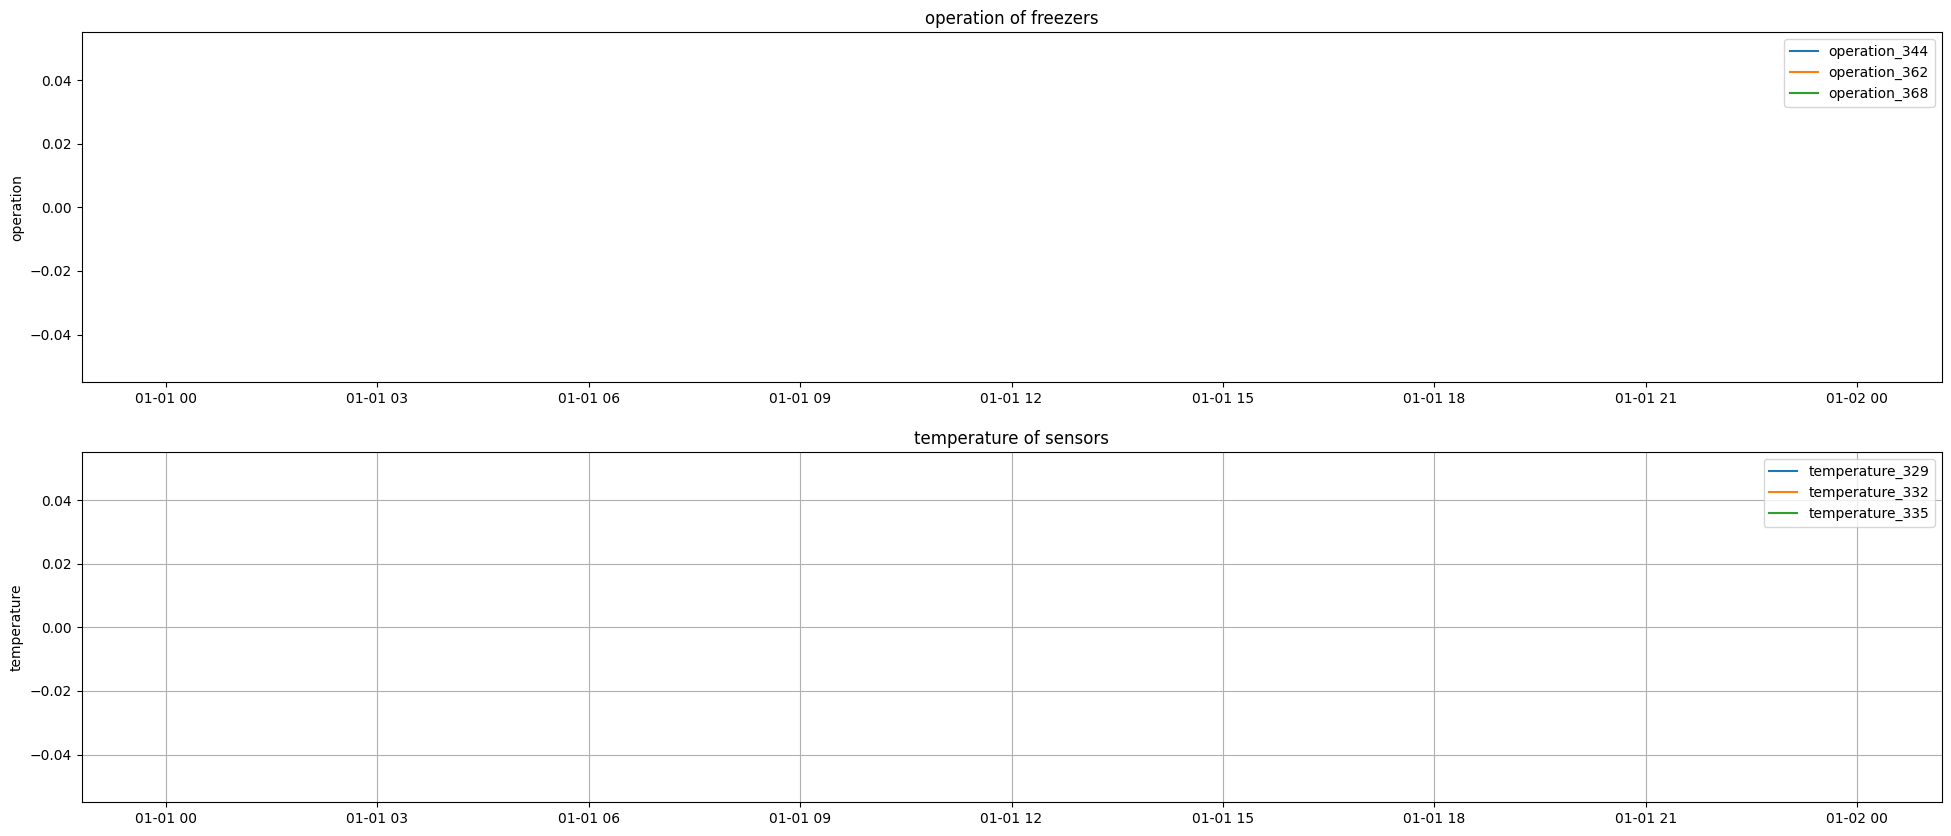

Plotting 70000:80000


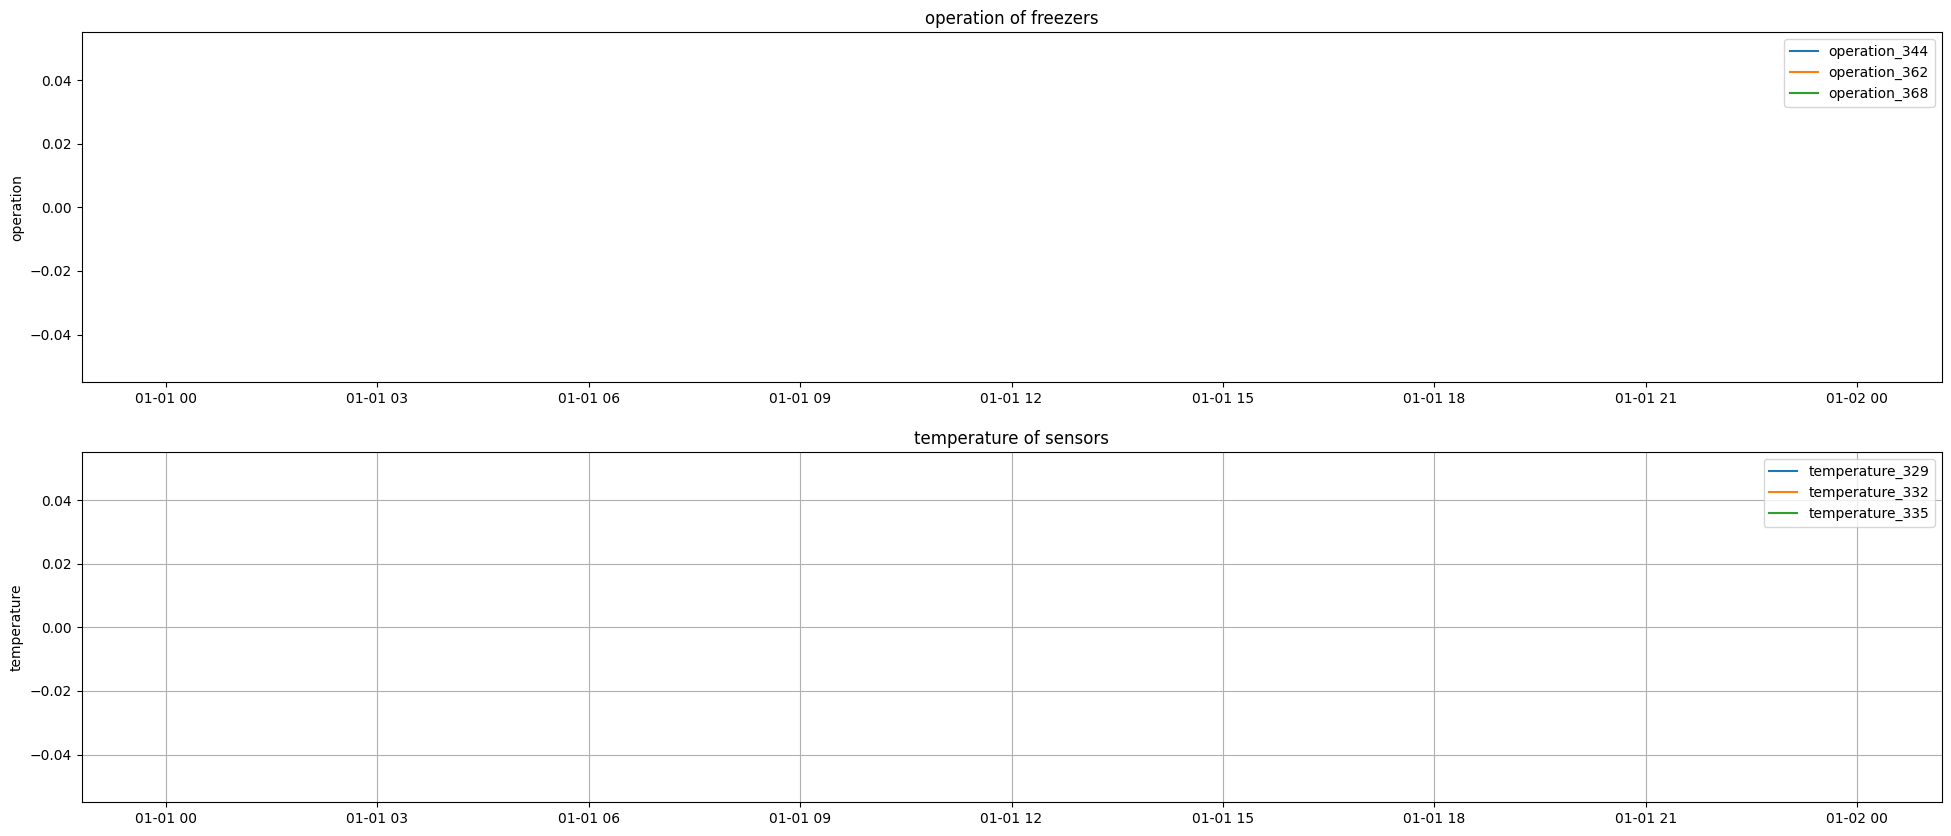

In [256]:
for i in range(0,8):
    test_plot(i*10000,(i+1)*10000, df1)

Plotting 70000:80000


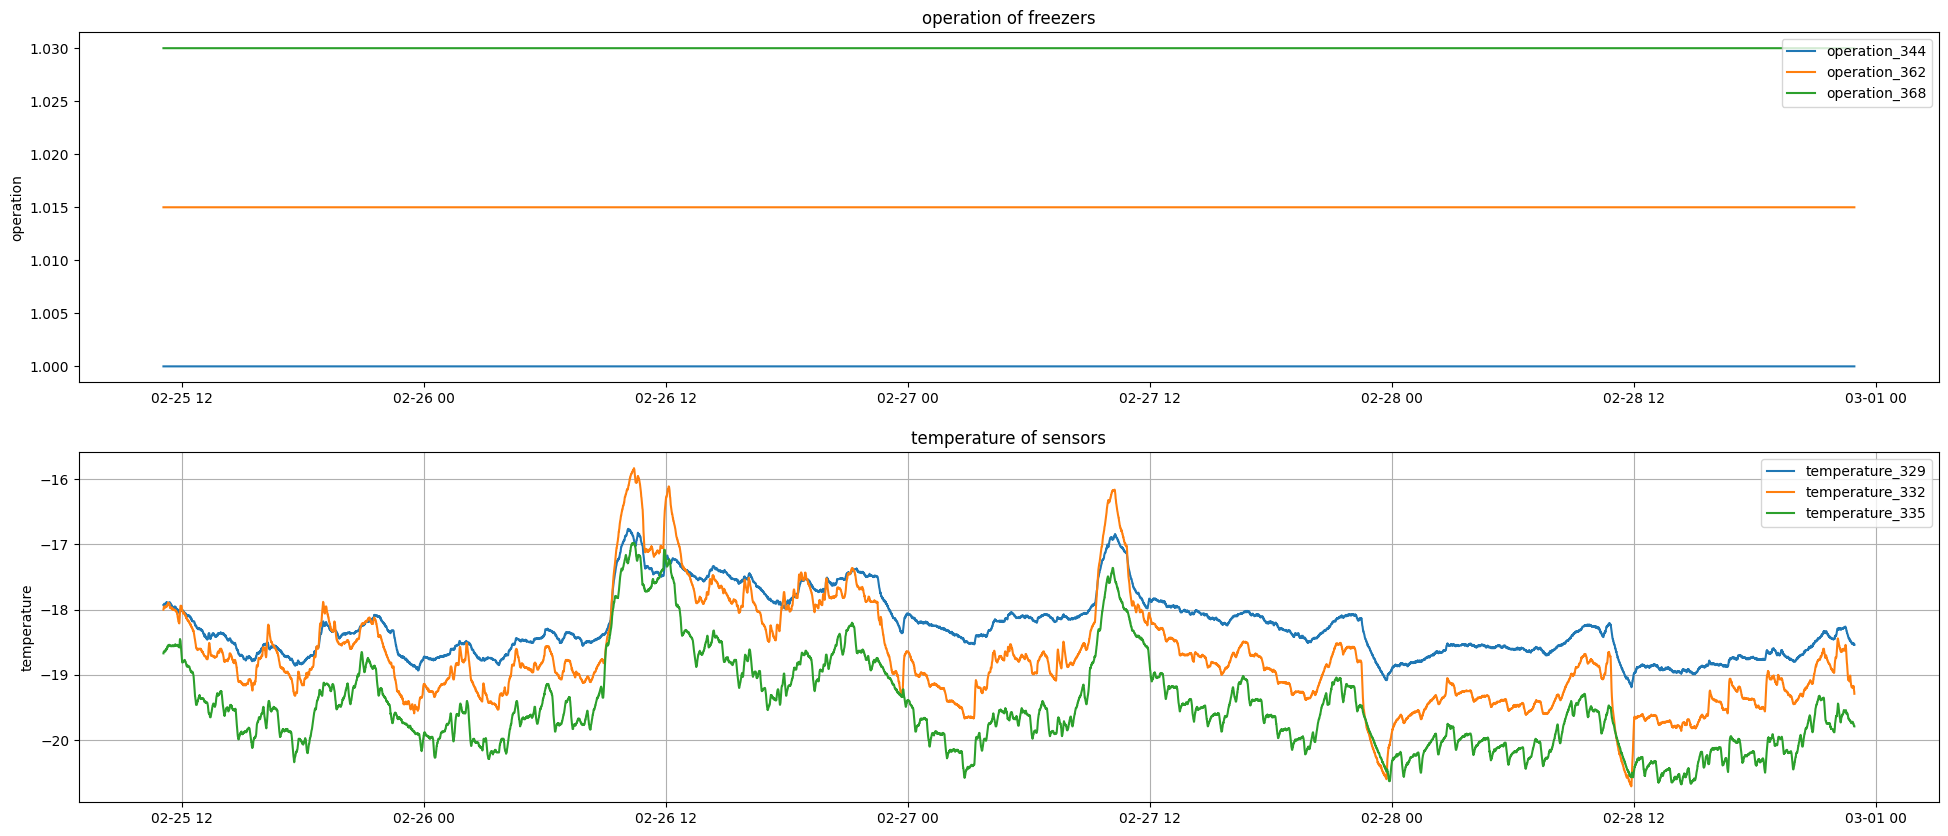

gw_time  temperature_329  temperature_332  temperature_335  \
70000 2021-02-25 11:03:51           -17.93           -18.00           -18.67   
70001 2021-02-25 11:04:21           -17.93           -17.98           -18.65   
70002 2021-02-25 11:04:52           -17.93           -17.97           -18.65   
70003 2021-02-25 11:05:22           -17.92           -17.96           -18.65   
70004 2021-02-25 11:05:52           -17.91           -17.95           -18.65   
...                   ...              ...              ...              ...   
79995 2021-02-28 22:52:37           -18.53           -19.18           -19.76   
79996 2021-02-28 22:53:07           -18.54           -19.20           -19.77   
79997 2021-02-28 22:53:38           -18.52           -19.24           -19.79   
79998 2021-02-28 22:54:08           -18.54           -19.25           -19.79   
79999 2021-02-28 22:54:38           -18.54           -19.29           -19.79   

       operation_344  operation_362  operation_368  dT_329  dT_332  dT_335  
70000            1.0            1.0            1.0    0.02    0.01    0.01  
70001            1.0            1.0            1.0    0.00    0.02    0.02  
70002            1.0            1.0            1.0    0.00    0.01    0.00  
70003            1.0            1.0            1.0    0.01    0.01    0.00  
70004            1.0            1.0            1.0    0.01    0.01    0.00  
...              ...            ...            ...     ...     ...     ...  
79995            1.0            1.0            1.0    0.00   -0.01   -0.01  
79996            1.0            1.0            1.0   -0.01   -0.02   -0.01  
79997            1.0            1.0            1.0    0.02   -0.04   -0.02  
79998            1.0            1.0            1.0   -0.02   -0.01    0.00  
79999            1.0            1.0            1.0    0.00   -0.04    0.00  

[10000 rows x 10 columns]

In [59]:
test_plot(70000,80000, df)

In [54]:
df3 = df[['gw_time']+['dT_335']+['temperature_335']]
df3[df3['gw_time'].between('2021-02-11 15:30:00','2021-02-11 16:00:00')]

gw_time  dT_335  temperature_335
30433 2021-02-11 15:30:02    0.00           -20.03
30434 2021-02-11 15:30:32    0.00           -20.03
30435 2021-02-11 15:31:02    0.00           -20.03
30436 2021-02-11 15:31:32    0.01           -20.02
30437 2021-02-11 15:32:02    0.00           -20.02
30438 2021-02-11 15:32:33    0.00           -20.02
30439 2021-02-11 15:33:03    0.01           -20.01
30440 2021-02-11 15:33:33    0.01           -20.00
30441 2021-02-11 15:34:03    0.00           -20.00
30442 2021-02-11 15:34:33    0.00           -20.00
30443 2021-02-11 15:35:03    0.00           -20.00
30444 2021-02-11 15:35:34    0.00           -20.00
30445 2021-02-11 15:36:04    0.01           -19.99
30446 2021-02-11 15:36:34    0.01           -19.98
30447 2021-02-11 15:37:04    0.00           -19.98
30448 2021-02-11 15:37:34    0.00           -19.98
30449 2021-02-11 15:38:04    0.00           -19.98
30450 2021-02-11 15:38:35    0.00           -19.98
30451 2021-02-11 15:39:05    0.00           -19.98
30452 2021-02-11 15:39:35    0.00           -19.98
30453 2021-02-11 15:40:05    0.01           -19.97
30454 2021-02-11 15:40:35   -0.01           -19.98
30455 2021-02-11 15:41:05    0.00           -19.98
30456 2021-02-11 15:41:36    0.00           -19.98
30457 2021-02-11 15:42:06    0.00           -19.98
30458 2021-02-11 15:42:36   -0.02           -20.00
30459 2021-02-11 15:43:06    0.02           -19.98
30460 2021-02-11 15:43:36   -0.02           -20.00
30461 2021-02-11 15:44:06    0.01           -19.99
30462 2021-02-11 15:44:37    0.00           -19.99
30463 2021-02-11 15:45:07   -0.01           -20.00
30464 2021-02-11 15:45:37    0.00           -20.00
30465 2021-02-11 15:46:07    0.00           -20.00
30466 2021-02-11 15:46:37    0.00           -20.00
30467 2021-02-11 15:47:07   -0.01           -20.01
30468 2021-02-11 15:47:38    0.01           -20.00
30469 2021-02-11 15:48:08   -0.01           -20.01
30470 2021-02-11 15:48:38    0.01           -20.00
30471 2021-02-11 15:49:08   -0.02           -20.02
30472 2021-02-11 15:49:38    0.00           -20.02
30473 2021-02-11 15:50:08    0.01           -20.01
30474 2021-02-11 15:50:39   -0.01           -20.02
30475 2021-02-11 15:51:09    0.00           -20.02
30476 2021-02-11 15:51:39    0.00           -20.02
30477 2021-02-11 15:52:09   -0.01           -20.03
30478 2021-02-11 15:52:39    0.01           -20.02
30479 2021-02-11 15:53:09    0.00           -20.02
30480 2021-02-11 15:53:40   -0.01           -20.03
30481 2021-02-11 15:54:10    0.00           -20.03
30482 2021-02-11 15:54:40    0.00           -20.03
30483 2021-02-11 15:55:10    0.00           -20.03
30484 2021-02-11 15:55:40    0.00           -20.03
30485 2021-02-11 15:56:10   -0.01           -20.04
30486 2021-02-11 15:56:41   -0.01           -20.05
30487 2021-02-11 15:57:11    0.01           -20.04
30488 2021-02-11 15:57:41    0.00           -20.04
30489 2021-02-11 15:58:11   -0.02           -20.06
30490 2021-02-11 15:58:41    0.02           -20.04
30491 2021-02-11 15:59:12   -0.02           -20.06
30492 2021-02-11 15:59:42    0.00           -20.06

In [64]:
df5

gw_time  temperature_329  temperature_332  temperature_335  \
0     2021-02-01 00:05:04           -20.30           -20.23           -20.28   
1     2021-02-01 00:05:34           -20.31           -20.24           -20.27   
2     2021-02-01 00:06:04           -20.31           -20.25           -20.27   
3     2021-02-01 00:06:35           -20.31           -20.23           -20.27   
4     2021-02-01 00:07:05           -20.30           -20.23           -20.27   
...                   ...              ...              ...              ...   
80124 2021-03-01 00:02:33           -18.94           -19.81           -20.67   
80125 2021-03-01 00:03:03           -18.95           -19.80           -20.67   
80126 2021-03-01 00:03:33           -18.93           -19.80           -20.65   
80127 2021-03-01 00:04:03           -18.95           -19.79           -20.64   
80128 2021-03-01 00:04:34           -18.93           -19.78           -20.64   

       operation_344  operation_362  operation_368  dT_329  dT_332  dT_335  
0                0.0            1.0            1.0    0.00    0.00    0.00  
1                0.0            1.0            1.0   -0.01   -0.01    0.01  
2                0.0            1.0            1.0    0.00   -0.01    0.00  
3                0.0            1.0            1.0    0.00    0.02    0.00  
4                0.0            1.0            1.0    0.01    0.00    0.00  
...              ...            ...            ...     ...     ...     ...  
80124            1.0            1.0            1.0    0.00    0.01    0.01  
80125            1.0            1.0            1.0   -0.01    0.01    0.00  
80126            1.0            1.0            1.0    0.02    0.00    0.02  
80127            1.0            1.0            1.0   -0.02    0.01    0.01  
80128            1.0            1.0            1.0    0.02    0.01    0.00  

[80129 rows x 10 columns]